In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

In [3]:
PATH='/home/andre/PycharmProjects/onos_short_path/parser/'
TXT_FILES_PATH = PATH + 'txtFiles/'
ITG_PATH = '/home/andre/Загрузки/D-ITG-2.8.1-r1023-src/D-ITG-2.8.1-r1023/bin/'

### Отправка пакетов размером 1000 byte с большим rate (10_000_000 pkts/s) в несколько потоков

<img src="assets/1-1_10m-1flow.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

##### Рост доли потерянных пакетов при увеличении количества потоков

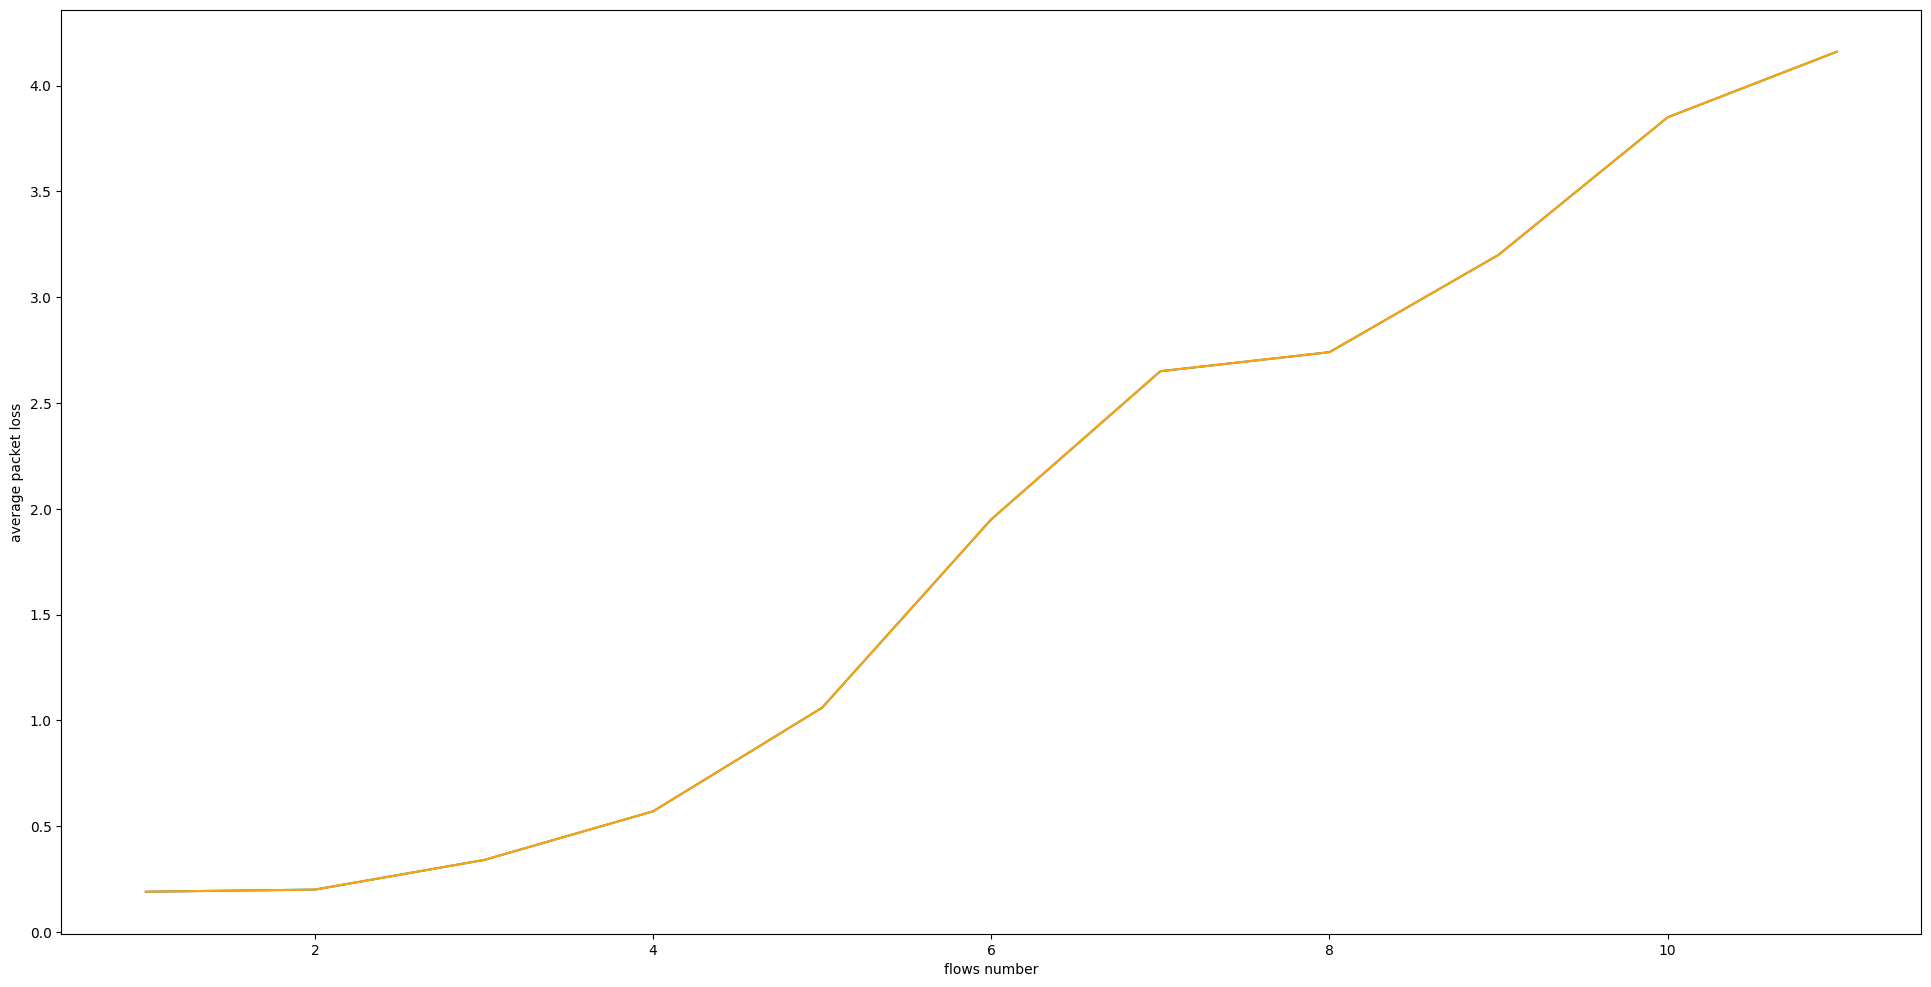

In [16]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = [1,2,3,4,5,6,7,8,9,10,11]
y = [0.19, 0.20, 0.34, 0.57, 1.06, 1.95, 2.65, 2.74, 3.20, 3.85, 4.16]
ax.plot(x, y)

ax.set_xlabel('flows number')
ax.set_ylabel('average packet loss')

ax.plot(x, y, color='orange')

plt.show()

#### Определение модели распределения?

### Отправка пакетов с 5 устройств на 1 (порт сохраняется)

#### -c 512 -C 1000 -t 10000

In [19]:
Time = []
with open(TXT_FILES_PATH + 'T.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        Time.append(split_line[0].replace(",", "."))

PL_lists = [[] for x in range(1,6)]
for i in range (2, 5+1):
    with open(TXT_FILES_PATH + f'PL{i}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            PL_lists[i-1].append(split_line[0].replace(",", "."))
    
df1 = pd.DataFrame({
    "time":Time,
    #"packetLoss1": PL_lists[0],
    "packetLoss2": PL_lists[1],
    "packetLoss3": PL_lists[2],
    "packetLoss4": PL_lists[3],
    "packetLoss5": PL_lists[4],
})
df1.time = df1.time.apply(float)
#df1.packetLoss1 = df1.packetLoss1.apply(float)
df1.packetLoss2 = df1.packetLoss2.apply(float)
df1.packetLoss3 = df1.packetLoss3.apply(float)
df1.packetLoss4 = df1.packetLoss4.apply(float)
df1.packetLoss5 = df1.packetLoss5.apply(float)
df1

time  packetLoss2  packetLoss3  packetLoss4  packetLoss5
0    0.00          0.0          1.0          0.0          5.0
1    0.01          0.0          0.0          0.0         15.0
2    0.02          0.0          0.0          0.0          0.0
3    0.03          0.0          0.0          0.0          0.0
4    0.04          0.0          0.0          1.0          0.0
..    ...          ...          ...          ...          ...
995  9.95         89.0          3.0          7.0          7.0
996  9.96          1.0         15.0          0.0          0.0
997  9.97          0.0          1.0          0.0        220.0
998  9.98          0.0          0.0          0.0         11.0
999  9.99          0.0          0.0          0.0        148.0

[1000 rows x 5 columns]

<img src="assets/2-to-1.png" width="600" />

<img src="assets/3-to-1.png" width="600" />

<img src="assets/4-to-1.png" width="600" />

<img src="assets/5-to-1.png" width="600" />

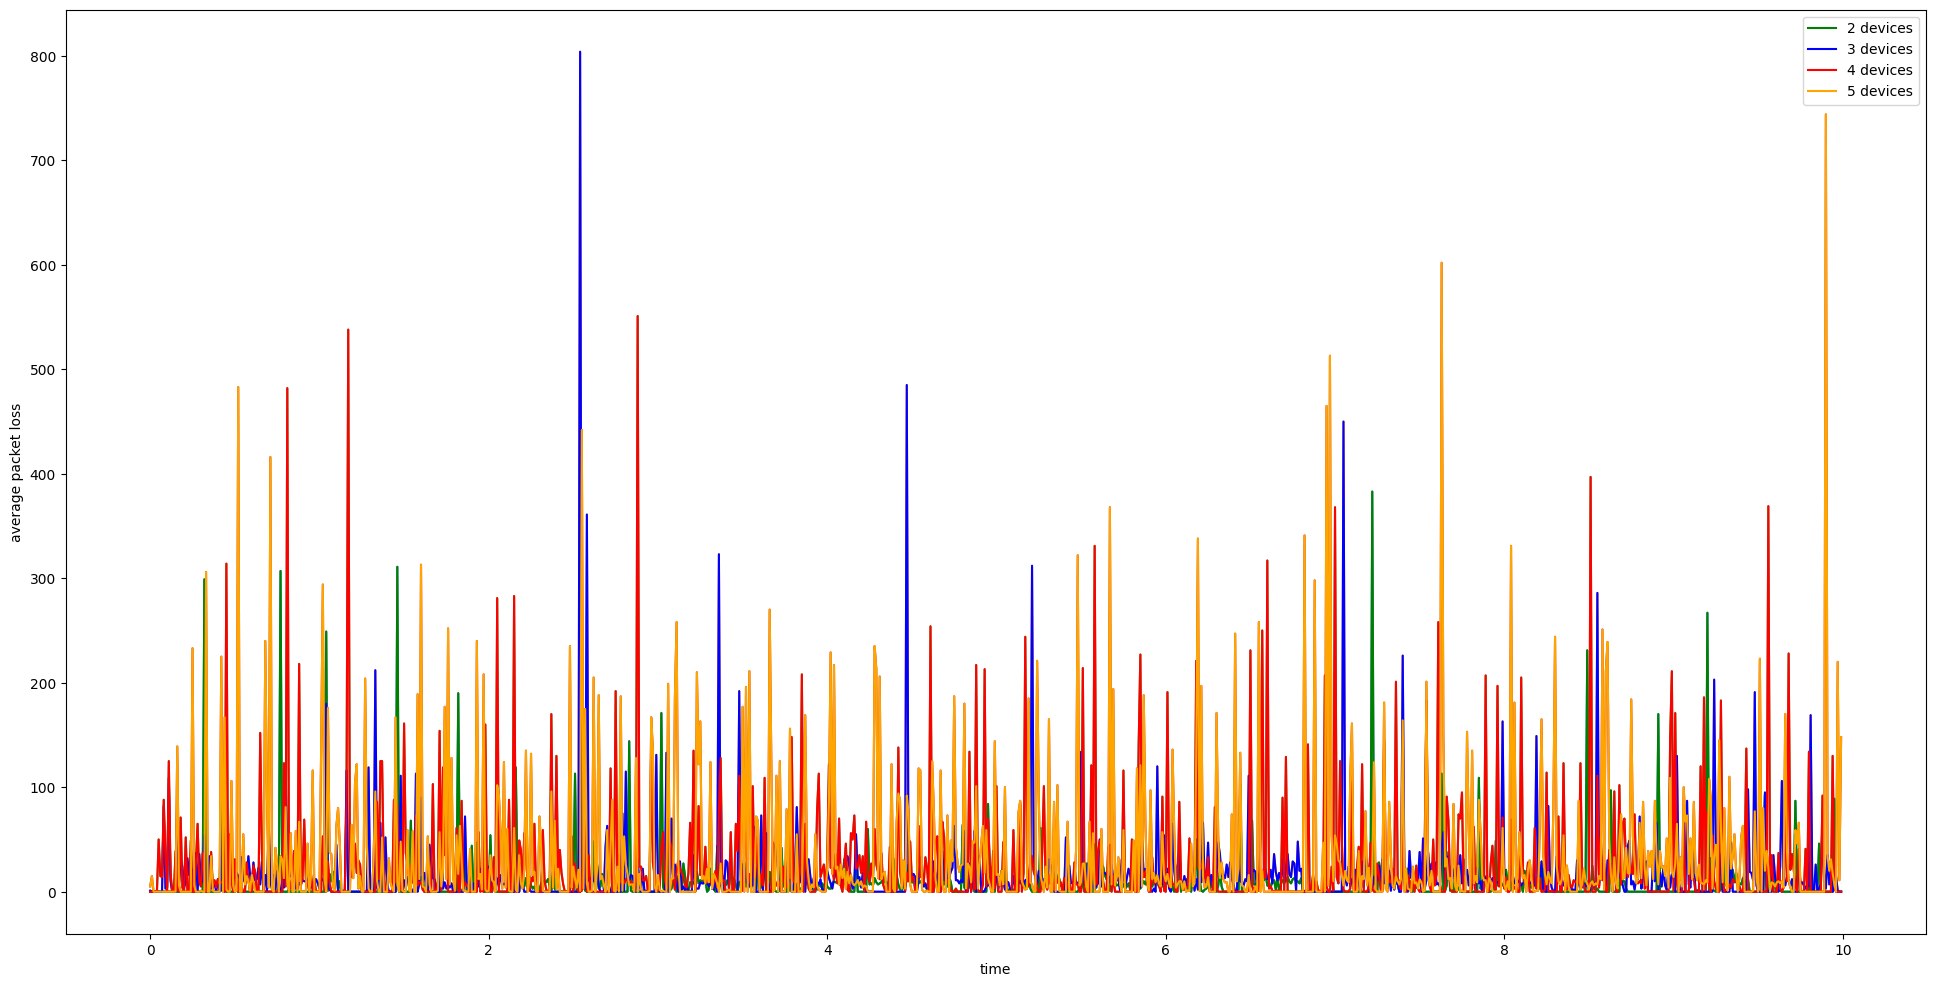

In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = df1['time']
#y1 = df1['packetLoss1']
y2 = df1['packetLoss2']
y3 = df1['packetLoss3']
y4 = df1['packetLoss4']
y5 = df1['packetLoss5']
#ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)

ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

#ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y2, label = '2 devices', color='green')
ax.plot(x, y3, label = '3 devices', color='blue')
ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y5, label = '5 devices', color='orange')
ax.legend()

plt.show()

#### Причина многократного роста Packet loss при отправки пакетов с разных устройств?

# All-to-all case

In [17]:
# number of hosts in topology
nodes_num = 16
# push average packet loss to file every <PT> milliseconds
PT = 100

In [18]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -p {PT} packetloss{i+1}.dat');

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 439924 characters

In [19]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
#             if len(split_line) != nodes_num+1:
#                 i += 1
#             else:
#                 recv_data[i].append(split_line[-1].replace(",", "."))
            recv_data[i].append(split_line[-1].replace(",", "."))
                
print(len(time))
for i in recv_data:
    print(len(i))

9792
602
613
614
617
612
614
611
612
610
611
613
612
614
613
612
612


In [20]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 602


time  packetloss1  packetloss2  packetloss3  packetloss4  packetloss5  \
1     0.0          0.0          0.0          0.0          0.0          0.0   
2     0.1          0.0          2.0          0.0          0.0          0.0   
3     0.2          0.0          0.0          0.0          0.0          0.0   
4     0.3          0.0          0.0          0.0          0.0          1.0   
5     0.4         80.0         99.0         78.0          0.0          0.0   
..    ...          ...          ...          ...          ...          ...   
597  59.6          0.0          0.0          0.0          0.0          0.0   
598  59.7          0.0          0.0          0.0          0.0          0.0   
599  59.8          0.0          0.0          0.0          0.0          0.0   
600  59.9         11.0         13.0         15.0          0.0         26.0   
601  60.0          0.0          0.0          0.0          0.0          0.0   

     packetloss6  packetloss7  packetloss8  packetloss9  packetloss10  \
1            0.0          0.0          0.0          0.0           0.0   
2            0.0          0.0          0.0         15.0           0.0   
3            0.0          0.0          0.0         26.0           0.0   
4            0.0         81.0          0.0         22.0           0.0   
5           65.0          0.0          0.0         12.0           0.0   
..           ...          ...          ...          ...           ...   
597          0.0          0.0          0.0          0.0           0.0   
598          0.0          0.0          0.0          0.0           0.0   
599          0.0         19.0          0.0          0.0           0.0   
600         11.0          0.0          0.0          0.0           0.0   
601          0.0          0.0          0.0          0.0           0.0   

     packetloss11  packetloss12  packetloss13  packetloss14  packetloss15  \
1             3.0           0.0           0.0           0.0           0.0   
2             0.0           0.0           0.0           0.0           0.0   
3             0.0           0.0           0.0           0.0           0.0   
4             0.0          79.0           0.0           0.0           0.0   
5             0.0           0.0           0.0           0.0           0.0   
..            ...           ...           ...           ...           ...   
597           0.0           0.0           0.0           0.0           0.0   
598           0.0           0.0           0.0           0.0           0.0   
599          26.0           0.0           0.0           0.0           0.0   
600           0.0           0.0           0.0          12.0           0.0   
601           0.0           0.0           0.0           0.0           0.0   

     packetloss16  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  
..            ...  
597           0.0  
598           0.0  
599           0.0  
600           0.0  
601           0.0  

[601 rows x 17 columns]

In [21]:
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -l recv{i+1}.txt')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 177520 characters

In [22]:
pl = []
received_pkts = []
dropped_pkts = []
mx = []
for i in range(nodes_num):
    map_count = {}
    map_max = {}
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            src_socket = split_line[4]
            addr_index = src_socket.index("/")
            src_addr = src_socket[:addr_index]
            if src_addr not in map_count:
                map_count[src_addr] = 0
                map_max[src_addr] = 0
            map_count[src_addr] += 1
            if int(split_line[2]) > map_max[src_addr]:
                map_max[src_addr] = int(split_line[2])
                
    num_received_pkts = sum(map_count.values())
    maximums = sum(map_max.values())
    mx.append(maximums)
    received_pkts.append(num_received_pkts)
    
    sum_rec = 0
    for i in map_max:
        if map_max[i] - map_count[i] < 0:
            continue
        sum_rec += map_max[i] - map_count[i]
    dropped_pkts.append(sum_rec)        
    #pl.append(round(sum_rec / sum(map_max.values()) * 100, 2))
    pl.append(round(((maximums - num_received_pkts) / maximums) * 100, 2))
    
    #dropped_pkts.append(maximums - num_received_pkts)
    #pl.append(round((1 - num_received_pkts / maximums) * 100, 2))
    
    
print(f'received pkts: {received_pkts}')
print(f'dropped_pkts: {dropped_pkts}; total: {sum(dropped_pkts)}')
total_pkts_num = 0
for i in received_pkts:
    total_pkts_num += i

print("total_pkts_num: ", total_pkts_num)
pkt_size = 4000
modeling_time = 60
print(f"throughput: {total_pkts_num / modeling_time * pkt_size / 125_000} Mbts/s \n")

print(f'Packetloss for each receiver: {pl}')
#print(f'Total packetloss: {round((sum(dropped_pkts) / (total_pkts_num + sum(dropped_pkts))) * 100, 5)} %')
print(f'Total packetloss: {round(( (sum(mx) - total_pkts_num) / sum(mx) ) * 100, 10)} %')

received pkts: [698191, 675502, 682318, 684076, 698009, 685556, 682502, 686620, 678508, 676043, 684387, 672854, 694227, 697934, 692766, 685998]
dropped_pkts: [8226, 2991, 6544, 3190, 2504, 3322, 3100, 4699, 1176, 2686, 5578, 3109, 3715, 3296, 3032, 1892]; total: 59060
total_pkts_num:  10975491
throughput: 5853.5952 Mbts/s 

Packetloss for each receiver: [1.16, 0.44, 0.95, 0.46, 0.36, 0.48, 0.45, 0.68, 0.17, 0.4, 0.81, 0.46, 0.53, 0.47, 0.44, 0.28]
Total packetloss: 0.5352279399 %


## Проверка на повторяющиеся пакеты

In [205]:
map_count = {}
map_max = {}
with open(ITG_PATH + f'recv{1}.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        src_socket = split_line[4]
        addr_index = src_socket.index("/")
        src_addr = src_socket[:addr_index]
        if src_addr not in map_count:
            map_count[src_addr] = 0
            map_max[src_addr] = 0
        map_count[src_addr] += 1
        if int(split_line[2]) > map_max[src_addr]:
            map_max[src_addr] = int(split_line[2])
#received_pkts.append(sum(map_count.values()))
#dropped_pkts.append(sum(map_max.values()) - sum(map_count.values()))
#pl.append(round((1 - sum(map_count.values()) / sum(map_max.values())) * 100, 2))

print(map_count)
print()
print(map_max)
print()
sum_rec = 0
for i in map_max:
    sum_rec += map_max[i] - map_count[i]
    print(f'{i}: {map_max[i] - map_count[i]}')
print(sum_rec)

{'192.168.0.2': 43707, '192.168.0.5': 48982, '192.168.0.3': 44197, '192.168.0.12': 47094, '192.168.0.11': 43684, '192.168.0.4': 45458, '192.168.0.9': 44874, '192.168.0.15': 45427, '192.168.0.13': 45280, '192.168.0.14': 45462, '192.168.0.10': 44350, '192.168.0.7': 45100, '192.168.0.6': 44150, '192.168.0.8': 45250}

{'192.168.0.2': 43719, '192.168.0.5': 49002, '192.168.0.3': 44200, '192.168.0.12': 47100, '192.168.0.11': 43688, '192.168.0.4': 45477, '192.168.0.9': 44914, '192.168.0.15': 45450, '192.168.0.13': 45300, '192.168.0.14': 45497, '192.168.0.10': 44350, '192.168.0.7': 45118, '192.168.0.6': 44169, '192.168.0.8': 45259}

192.168.0.2: 12
192.168.0.5: 20
192.168.0.3: 3
192.168.0.12: 6
192.168.0.11: 4
192.168.0.4: 19
192.168.0.9: 40
192.168.0.15: 23
192.168.0.13: 20
192.168.0.14: 35
192.168.0.10: 0
192.168.0.7: 18
192.168.0.6: 19
192.168.0.8: 9
228


In [50]:
map_count = {}
map_max = {}
nums = []
addrs = []
with open(ITG_PATH + f'recv{5}.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        src_socket = split_line[4]
        addr_index = src_socket.index("/")
        src_addr = src_socket[:addr_index]
        
        nums.append(int(split_line[2]))
        addrs.append(src_addr)

pl_df = pd.DataFrame({'pkt_num':nums, 'addr':addrs})
pl_df

pkt_num          addr
0            1   192.168.0.7
1            2   192.168.0.7
2            3   192.168.0.7
3            4   192.168.0.7
4            5   192.168.0.7
...        ...           ...
32536     2987  192.168.0.12
32537     2988  192.168.0.12
32538     2989  192.168.0.12
32539     2990  192.168.0.12
32540     2991  192.168.0.12

[32541 rows x 2 columns]

In [51]:
for i in range(1,16):
    kk = pl_df.loc[(pl_df['addr'] == f'192.168.0.{i}')]
    duplicateRows = kk[kk.duplicated(['pkt_num'])]
    a = f'192.168.0.{i}'
    print(a, len(pl_df.query(f"addr == '192.168.0.{i}'")), len(duplicateRows))

192.168.0.1 2800 0
192.168.0.2 2900 0
192.168.0.3 2650 0
192.168.0.4 2500 0
192.168.0.5 0 0
192.168.0.6 2850 0
192.168.0.7 2900 0
192.168.0.8 2100 0
192.168.0.9 0 0
192.168.0.10 2900 0
192.168.0.11 2700 0
192.168.0.12 2991 0
192.168.0.13 0 0
192.168.0.14 2350 0
192.168.0.15 2900 0


In [124]:
kk = pl_df.loc[(pl_df['addr'] == f'192.168.0.14')]
duplicateRows = kk[kk.duplicated(['pkt_num'])]
duplicateRows

pkt_num          addr
39169     1884  192.168.0.14
39170     1885  192.168.0.14
39171     1886  192.168.0.14
39172     1887  192.168.0.14
39173     1888  192.168.0.14
...        ...           ...
54774     2660  192.168.0.14
54775     2661  192.168.0.14
54776     2662  192.168.0.14
54777     2663  192.168.0.14
54778     2664  192.168.0.14

[1128 rows x 2 columns]

In [126]:
pl_df.loc[(pl_df['addr'] == '192.168.0.14') & (pl_df['pkt_num'] == 2664)]

pkt_num          addr
53022     2664  192.168.0.14
53699     2664  192.168.0.14
54134     2664  192.168.0.14
54778     2664  192.168.0.14

In [127]:
pl_df_copy = pl_df.drop_duplicates(keep='first')
pl_df_copy

pkt_num         addr
0            1  192.168.0.6
1            2  192.168.0.6
2            3  192.168.0.6
3            4  192.168.0.6
4            5  192.168.0.6
...        ...          ...
55987     3825  192.168.0.4
55988     3826  192.168.0.4
55989     3827  192.168.0.4
55990     3828  192.168.0.4
55991     3829  192.168.0.4

[54037 rows x 2 columns]

In [128]:
for i in range(1,16):
    kk = pl_df_copy.loc[(pl_df_copy['addr'] == f'192.168.0.{i}')]
    duplicateRows = kk[kk.duplicated(['pkt_num'])]
    a = f'192.168.0.{i}'
    print(a, len(pl_df_copy.query(f"addr == '192.168.0.{i}'")), len(duplicateRows))

192.168.0.1 6480 0
192.168.0.2 4083 0
192.168.0.3 4310 0
192.168.0.4 3663 0
192.168.0.5 0 0
192.168.0.6 5205 0
192.168.0.7 4314 0
192.168.0.8 4157 0
192.168.0.9 3150 0
192.168.0.10 3811 0
192.168.0.11 2552 0
192.168.0.12 3270 0
192.168.0.13 2453 0
192.168.0.14 2572 0
192.168.0.15 4017 0


### ------------------------------------------------------------------------------------------------------------------------------------------------------- ###

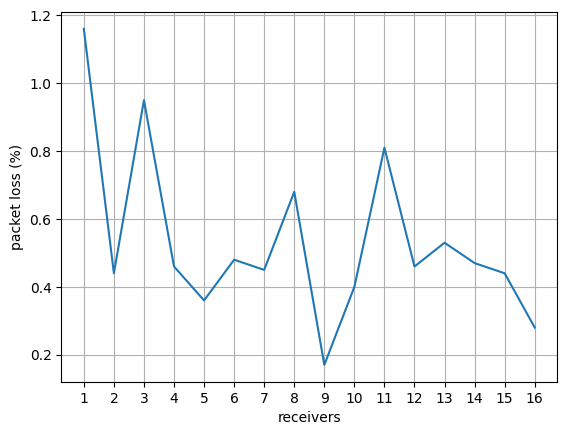

In [23]:
# plt.rc('font', size= 15)
# _, ax = plt.subplots(figsize=(24, 12), ncols=1)

# ax.plot([x for x in range(1, nodes_num+1)], pl)

# fontsize = 15
# ax.set_xlabel('receivers', fontsize=fontsize)
# ax.grid()
# ax.set_ylabel('packet loss (%)', fontsize=fontsize)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# plt.show()

plt.rc('font', size=10)
_, ax = plt.subplots( ncols=1)

ax.plot([x for x in range(1, nodes_num+1)], pl)

fontsize = 10
ax.set_xlabel('receivers', fontsize=fontsize)
ax.grid()
ax.set_ylabel('packet loss (%)', fontsize=fontsize)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

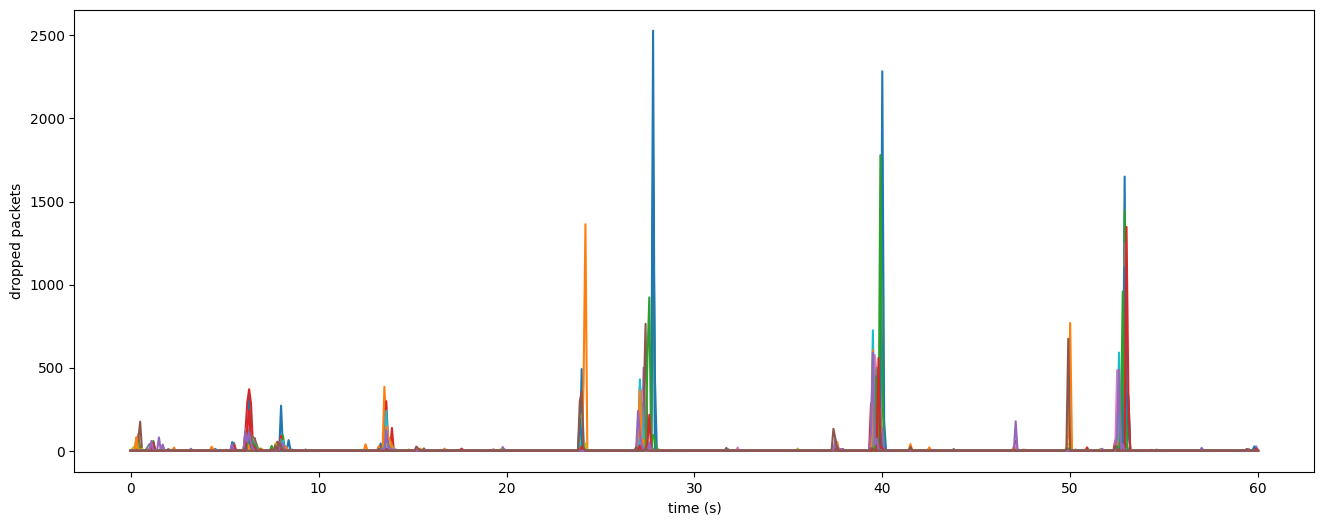

In [24]:
plt.rc('font', size= 10)
_, ax = plt.subplots(figsize=(16, 6), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

fontsize = 10
#ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time (s)', fontsize=fontsize)
ax.set_ylabel('dropped packets', fontsize=fontsize)

plt.show()

# _, ax = plt.subplots(ncols=1)
# ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

# #ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
# ax.set_xlabel('time (s)', fontsize=fontsize)
# ax.set_ylabel('dropped packets', fontsize=fontsize)

# plt.show()

In [25]:
modeling_time = 60
plhist = []
plhist
step = 5
for j in np.arange(0, modeling_time, step):
    s = 0
    for i in range(1, nodes_num):
        if j != modeling_time - step:
            s += len(pl_df.query(f"time >= {j} and time <= {j+step} and packetloss{i} > 0.0"))
        else:
            s += len(pl_df.query(f"time >= {j} and packetloss{i} > 0.0"))
    plhist.append(s)
print(plhist)
df = pd.DataFrame({
    'time': [x for x in np.arange(step,modeling_time+step,step)],
    'pkts': plhist
    })

[57, 152, 74, 19, 29, 95, 7, 74, 14, 24, 84, 18]


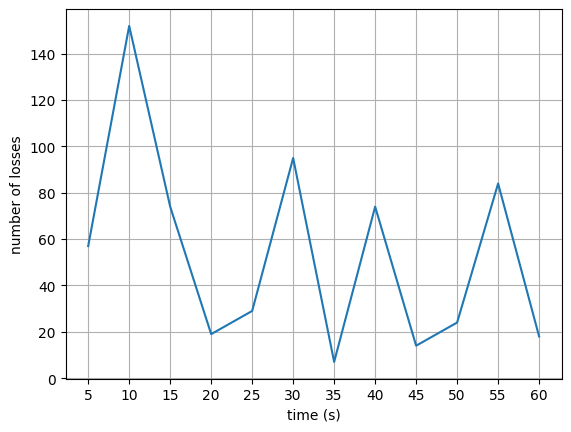

In [26]:
# import matplotlib.ticker as ticker
# plt.rc('font', size= 15)
# _, ax = plt.subplots(figsize=(24, 12), ncols=1)
# # ax.scatter(df['time'], plhist)
# ax.plot(df['time'], plhist)

# fontsize = 15
# ax.set_xlabel('time (s)', fontsize=fontsize)
# ax.grid()
# ax.set_ylabel('number of losses', fontsize=fontsize)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# plt.show()

import matplotlib.ticker as ticker
_, ax = plt.subplots( ncols=1)
ax.plot(df['time'], plhist)

ax.set_xlabel('time (s)', fontsize=fontsize)
ax.grid()
ax.set_ylabel('number of losses', fontsize=fontsize)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

In [27]:
modeling_time = 60
plhist = []
plhist
step = 5
for j in np.arange(0, modeling_time, step):
    s = 0
    for i in range(1, nodes_num):
        if j != modeling_time - step:
            s += pl_df.loc[(pl_df['time'] >= j) & (pl_df['time'] <= j+step), f'packetloss{i}'].sum()
        else:
            s += pl_df.loc[pl_df['time'] >= j, f'packetloss{i}'].sum()
    plhist.append(s)
print(f'{plhist}; total: {sum(plhist)}')
df = pd.DataFrame({
    'time': [x for x in np.arange(step,modeling_time+step,step)],
    'pkts': plhist
    })

[1441.0, 6886.0, 2993.0, 144.0, 3122.0, 13704.0, 54.0, 13553.0, 3085.0, 1348.0, 14345.0, 209.0]; total: 60884.0


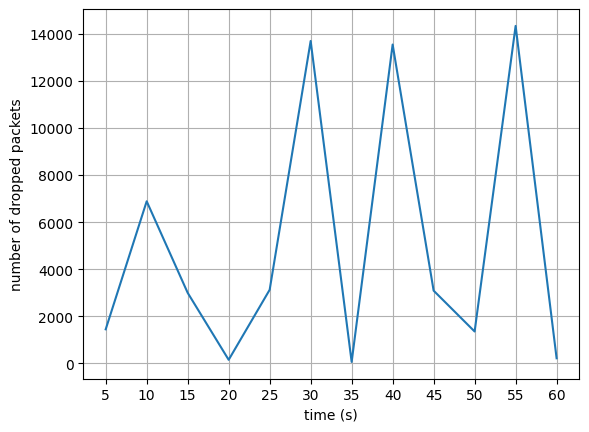

In [28]:
# import matplotlib.ticker as ticker
# plt.rc('font', size= 15)
# _, ax = plt.subplots(figsize=(24, 12), ncols=1)
# # ax.scatter(df['time'], plhist)
# ax.plot(df['time'], plhist)

# fontsize = 15
# ax.set_xlabel('time (s)', fontsize=fontsize)
# ax.grid()
# ax.set_ylabel('number of dropped packets', fontsize=fontsize)

# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# plt.show()

import matplotlib.ticker as ticker
_, ax = plt.subplots(ncols=1)
ax.plot(df['time'], plhist)

fontsize = 10
ax.set_xlabel('time (s)')
ax.grid()
ax.set_ylabel('number of dropped packets')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

In [29]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

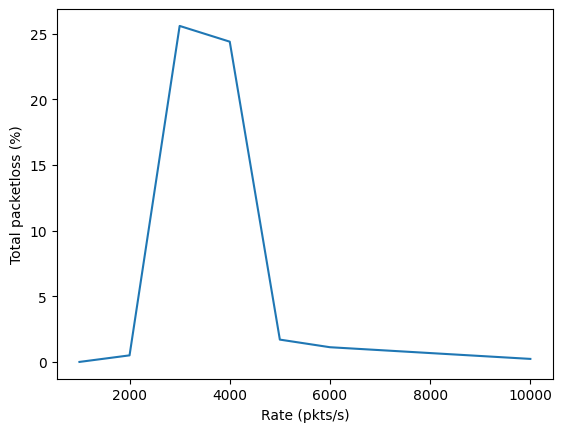

In [237]:
y = [0.0,0.5,25.6,24.4,1.7,1.12,0.23]
x = [1000,2000,3000,4000,5000,6000,10_000]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Rate (pkts/s)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

In [93]:
y = [0.0,0.0,0.2,7.1,13.6,16.29,14.6,6.52,0.0,0.0]
x = [80,90,100,110,120,125,130,133,140,150]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Packet size (bytes)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

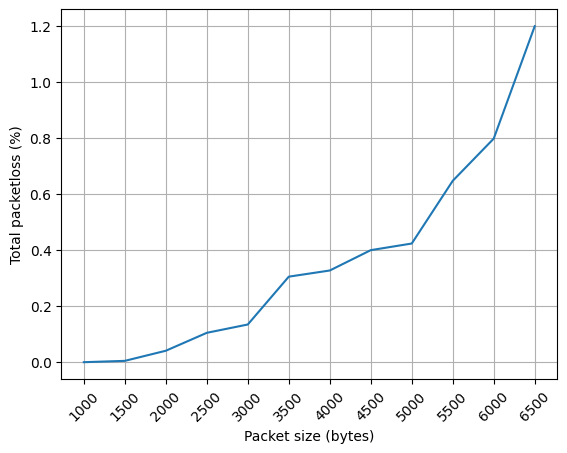

In [3]:
#y = [0.0,0.00042,0.00134,0.01199,0.05,0.10344,0.20733,0.26713,0.34215,0.38253,0.41633,0.56498,0.71105]
#x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]
# 1Gbit/s все links 1.11483
y = [0.00043,0.00516,0.04127,0.10528,0.13497,0.30575,0.32778,0.4004, 0.4241,0.64797,0.79869,1.2]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]


_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

In [29]:
#y = [0.0,0.00042,0.00134,0.01199,0.05,0.10344,0.20733,0.26713,0.34215,0.38253,0.41633,0.56498,0.71105]
#x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]
y = [0.0,0.01407,0.036232571,0.027774999,0.197683512,0.242106948,0.288195539,0.336595297,0.376397135,0.447439424,0.650710298,0.685132042]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

# 1 Gbit hosts/ 10Gbit switches

_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y, color='#ff7f0e')

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

[0.00043, -0.00891, 0.005037429000000003, 0.07750500099999999, -0.062713512, 0.06364305200000003, 0.039584461000000015, 0.06380470299999996, 0.04770286499999998, 0.20053057600000007, 0.147979702, 0.514867958]
avg y: 0.09078851958333334


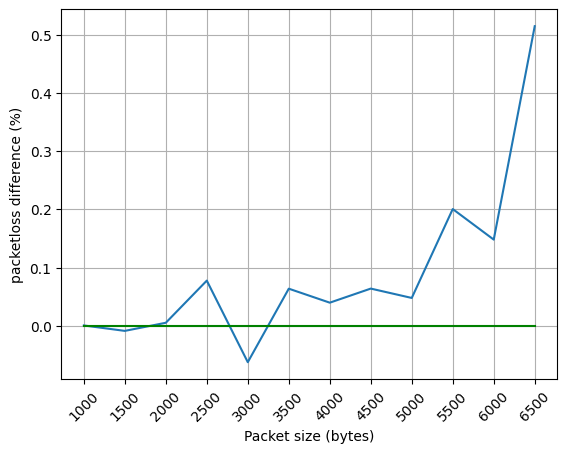

In [10]:
#y = [0.0,0.00042,0.00134,0.01199,0.05,0.10344,0.20733,0.26713,0.34215,0.38253,0.41633,0.56498,0.71105]
#x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]
y2 = [0.00043,0.00516,0.04127,0.10528,0.13497,0.30575,0.32778,0.4004, 0.4241,0.64797,0.79869,1.2]
y1 = [0.0,0.01407,0.036232571,0.027774999,0.197683512,0.242106948,0.288195539,0.336595297,0.376397135,0.447439424,0.650710298,0.685132042]
y = []
for i in range(len(y2)):
    y.append(y2[i]-y1[i])
print(y)
print(f'avg y: {sum(y) / len(y)}')
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]
y0 = [0 for _ in range(len(x))]
# 1 Gbit hosts/ 10Gbit switches

_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)
ax1.plot(x, y0, color='g')

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('packetloss difference (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

In [40]:
#y = [0.0,0.00042,0.00134,0.01199,0.05,0.10344,0.20733,0.26713,0.34215,0.38253,0.41633,0.56498,0.71105]
#x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]
y = [0.0,0.00042,0.00134,0.01199,0.05,0.10344,0.20733,0.26713,0.34215,0.38253,0.41633,0.56498]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

# Custom case

In [89]:
# number of hosts in topology
nodes_num = 6
# push average packet loss to file every <PT> milliseconds
PT = 100

In [90]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -p {PT} packetloss{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 277484 characters

In [91]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
#             if len(split_line) != nodes_num+1:
#                 i += 1
#             else:
#                 recv_data[i].append(split_line[-1].replace(",", "."))
            recv_data[i].append(split_line[-1].replace(",", "."))
                
print(len(time))
for i in recv_data:
    print(len(i))

3621
603
604
604
604
603
603


In [92]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 603


time  packetloss1  packetloss2  packetloss3  packetloss4  packetloss5  \
1     0.0          0.0          0.0          0.0          0.0          0.0   
2     0.1          0.0          0.0          0.0          0.0          0.0   
3     0.2          0.0          0.0          0.0          0.0          0.0   
4     0.3          0.0          0.0          0.0          0.0          0.0   
5     0.4          0.0          0.0          0.0          0.0          0.0   
..    ...          ...          ...          ...          ...          ...   
598  59.7          0.0          0.0          0.0          0.0          0.0   
599  59.8          0.0          0.0          0.0          0.0          0.0   
600  59.9          0.0          0.0          0.0          0.0          0.0   
601  60.0          0.0          0.0          0.0          0.0          0.0   
602  60.1          0.0          0.0          0.0          0.0          0.0   

     packetloss6  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
..           ...  
598          0.0  
599          0.0  
600          0.0  
601          0.0  
602          0.0  

[602 rows x 7 columns]

In [93]:
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -l recv{i+1}.txt')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 111020 characters

In [94]:
pl = []
received_pkts = []
dropped_pkts = []
for i in range(nodes_num):
    map_count = {}
    map_max = {}
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            src_socket = split_line[4]
            addr_index = src_socket.index("/")
            src_addr = src_socket[:addr_index]
            if src_addr not in map_count:
                map_count[src_addr] = 0
                map_max[src_addr] = 0
            map_count[src_addr] += 1
            if int(split_line[2]) > map_max[src_addr]:
                map_max[src_addr] = int(split_line[2])
                
    num_received_pkts = sum(map_count.values())
    maximums = sum(map_max.values())
    received_pkts.append(num_received_pkts)
    
    sum_rec = 0
    for i in map_max:
        if map_max[i] - map_count[i] < 0:
            continue
        sum_rec += map_max[i] - map_count[i]
    dropped_pkts.append(sum_rec)        
    pl.append(round(sum_rec / (sum_rec + num_received_pkts) * 100, 2))
    
    #dropped_pkts.append(maximums - num_received_pkts)
    #pl.append(round((1 - num_received_pkts / maximums) * 100, 2))
    
    
print(f'received pkts: {received_pkts}')
print(f'dropped_pkts: {dropped_pkts}; total: {sum(dropped_pkts)}')
total_pkts_num = 0
for i in received_pkts:
    total_pkts_num += i

print("total_pkts_num: ", total_pkts_num)
pkt_size = 2000
modeling_time = 60
print(f"throughput: {total_pkts_num / modeling_time * pkt_size / 125_000} Mbts/s \n")

print(f'Packetloss for each receiver: {pl}')
print(f'Total packetloss: {round((sum(dropped_pkts) / (total_pkts_num + sum(dropped_pkts))) * 100, 2)} %')

received pkts: [138742, 138889, 138832, 138817, 112535, 112462]
dropped_pkts: [0, 0, 0, 0, 0, 0]; total: 0
total_pkts_num:  780277
throughput: 208.07386666666665 Mbts/s 

Packetloss for each receiver: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Total packetloss: 0.0 %


In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.set_ylabel('average packet loss (%)')

plt.show()

In [22]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

plt.show()

In [93]:
modeling_time = 10
plhist = [0]*modeling_time
plhist
for i in range(1, nodes_num+1):
    for j in range(0, modeling_time):
        if j != 9:
            plhist[j] += len(pl_df.query(f"time >= {j}.0 and time <= {j+1}.0 and packetloss{i} > 0.0"))
        else:
            plhist[j] += len(pl_df.query(f"time >= {j}.0 and packetloss{i} > 0.0"))
print(plhist)
df = pd.DataFrame({
    'time': [x for x in range(1,modeling_time+1)],
    'pkts': plhist
    })
df

[371, 69, 15, 24, 12, 11, 7, 7, 12, 16]


time  pkts
0     1   371
1     2    69
2     3    15
3     4    24
4     5    12
5     6    11
6     7     7
7     8     7
8     9    12
9    10    16

In [94]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time')
ax.grid()
ax.set_ylabel('average number of dropped packets')

plt.show()

10347


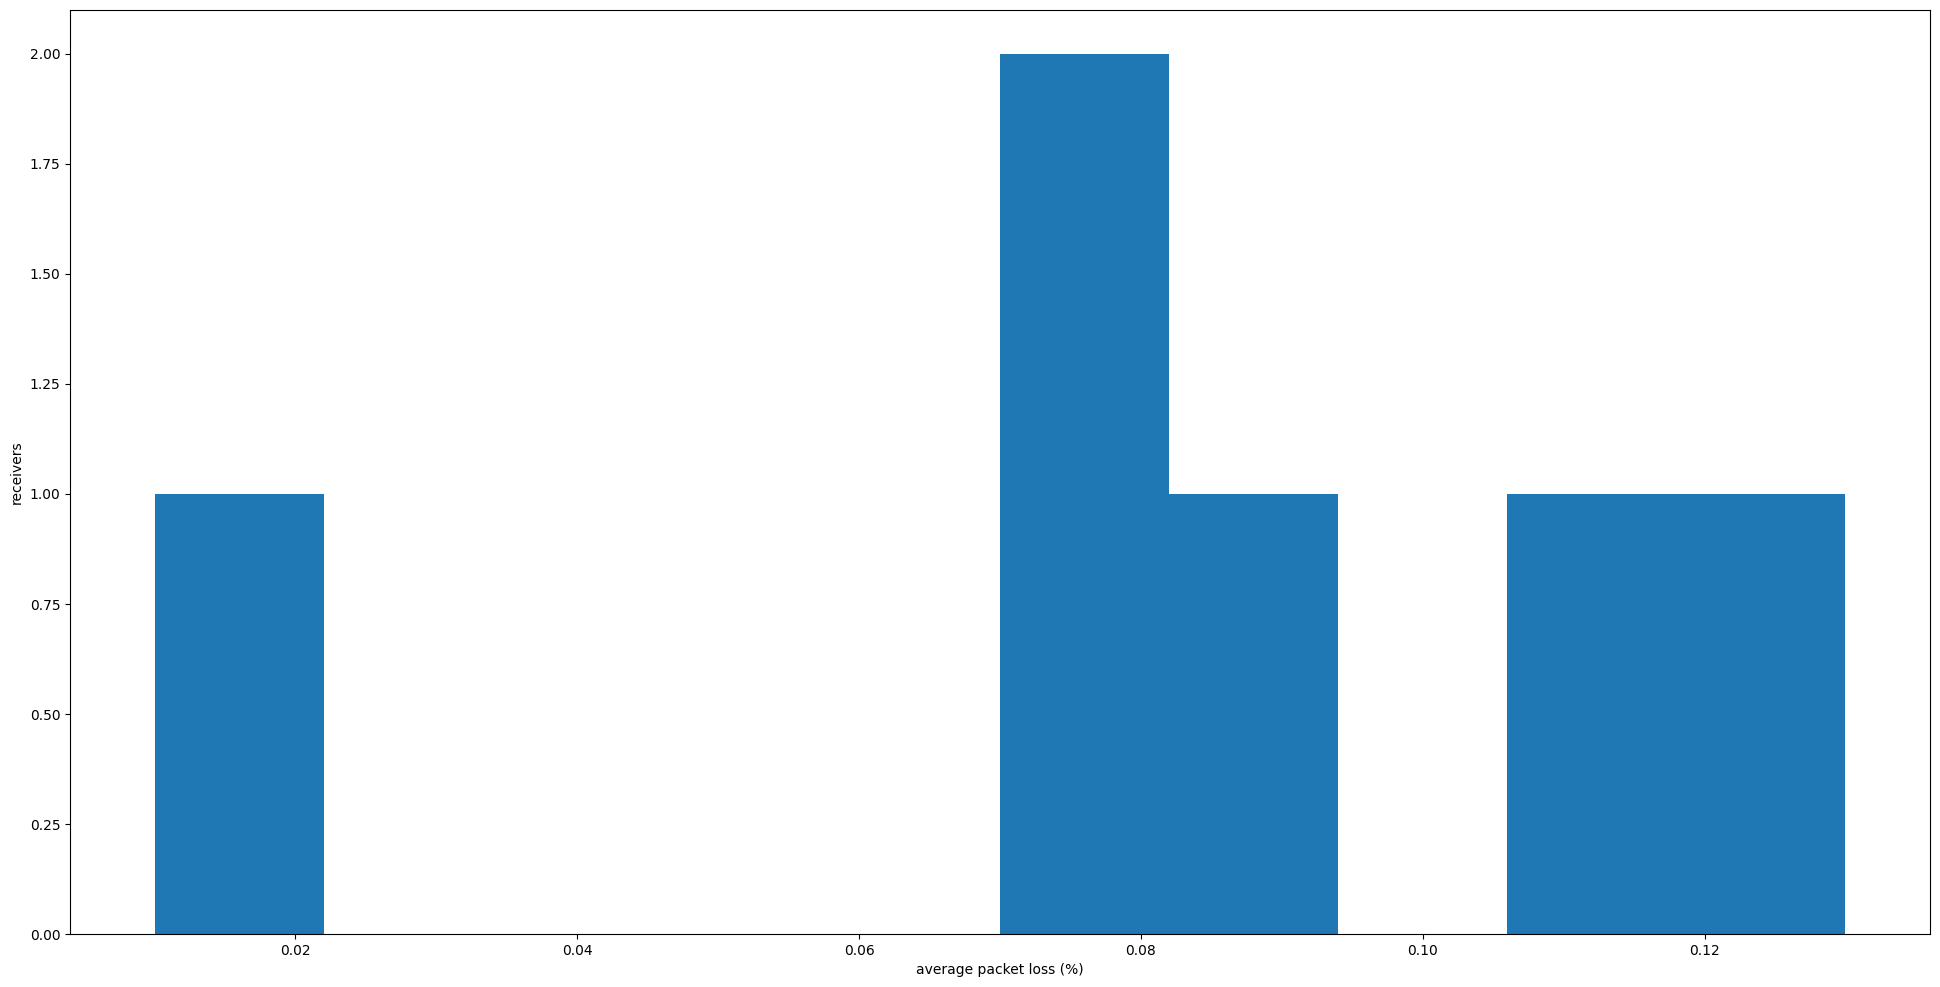

In [28]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
print(len(pl_df.iloc[:col_len, 1:nodes_num+1]))
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

## Average Delay

In [32]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -c 10 combined_stats{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 453404 characters

#### считаем по всем записям (~700_000)

In [47]:
from datetime import datetime, timedelta

delays = []
jitters = []
C = 0
S = timedelta()
for i in range(nodes_num):
    c = 0
    sum_delay = timedelta()
    last_delay = timedelta()
    jitter = timedelta()
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            C += 1
            c += 1
            split_line = line.split()
            tx_time = split_line[7][7:]
            rx_time = split_line[8][7:]
            delay = datetime.strptime(rx_time,"%H:%M:%S.%f") - datetime.strptime(tx_time,"%H:%M:%S.%f") 
            S += delay
            sum_delay += delay
            if last_delay != timedelta():
                jitter += abs(last_delay - delay)
            last_delay = delay
    jitters.append((jitter / (c - 1)).microseconds)
    delays.append((sum_delay / c).microseconds)

print(f'delays: {delays}')
print(f'avg delay for topo: {S / C}')
print(f'jitters: {jitters}')

delays: [774, 539, 646, 539, 484, 530, 596, 611, 364, 499, 609, 544, 538, 474, 540, 368]
avg delay for topo: 0:00:00.000541
jitters: [127, 112, 113, 109, 106, 111, 113, 104, 91, 96, 110, 107, 101, 102, 106, 84]


#### считаем только по первым 100_000 записей

In [60]:
from datetime import datetime, timedelta
from itertools import islice

delays = []
jitters = []
C = 0
S = timedelta()
for i in range(nodes_num):
    c = 0
    sum_delay = timedelta()
    last_delay = timedelta()
    jitter = timedelta()
    min_row_read = 50_000
    max_row_read = 150_000
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in islice(f, min_row_read-1, None):
            C += 1
            c += 1
            split_line = line.split()
            tx_time = split_line[7][7:]
            rx_time = split_line[8][7:]
            delay = datetime.strptime(rx_time,"%H:%M:%S.%f") - datetime.strptime(tx_time,"%H:%M:%S.%f") 
            S += delay
            sum_delay += delay
            if last_delay != timedelta():
                jitter += abs(last_delay - delay)
            last_delay = delay
            if c == max_row_read:
                break
    jitters.append((jitter / (c - 1)).microseconds)
    delays.append((sum_delay / c).microseconds)

print(f'delays: {delays}')
print(f'avg delay for topo: {S / C}')
print(f'jitters: {jitters}')

delays: [625, 853, 594, 995, 426, 647, 725, 696, 628, 483, 503, 647, 496, 512, 644, 284]
avg delay for topo: 0:00:00.000610
jitters: [171, 179, 162, 182, 133, 169, 169, 153, 141, 114, 136, 149, 142, 143, 145, 89]


##### 1500 1500
[322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
##### 0:00:00.000340

## 16 all-to-all -C 1000 -c 6500 UDP bw=1Gbit/s - hosts;  bw=1Gbit/s - switches

mean delays: 1.2715625 ms


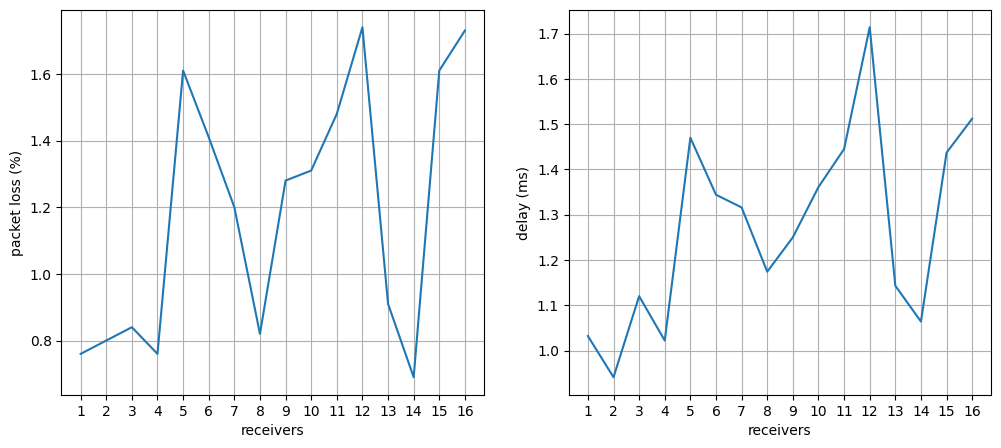

In [84]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
delays = [1032, 941, 1120, 1022, 1470, 1344, 1316, 1174, 1250, 1361, 1445, 1714, 1143, 1064, 1437, 1512]
y = [(x / 1000) for x in delays]
x = [x for x in range(1,17)]
pl = [0.76, 0.8, 0.84, 0.76, 1.61, 1.41, 1.2, 0.82, 1.28, 1.31, 1.48, 1.74, 0.91, 0.69, 1.61, 1.73]
print(f'mean delays: {mean(delays) / 1000} ms')

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, pl)
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('packet loss (%)')

ax[1].plot(x, y)
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('delay (ms)')

# ax[0].plot(x, y)

# ax[0].grid()
# ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
# xlabels = ax[0].xaxis.get_ticklabels()
# ylabels = ax[0].yaxis.get_ticklabels()

# ax[0].set_xlabel('receivers')
# ax[0].set_ylabel('delay (ms)')

# ax[1].plot(x, pl)
plt.show()

mean jitter: 0.405625 ms


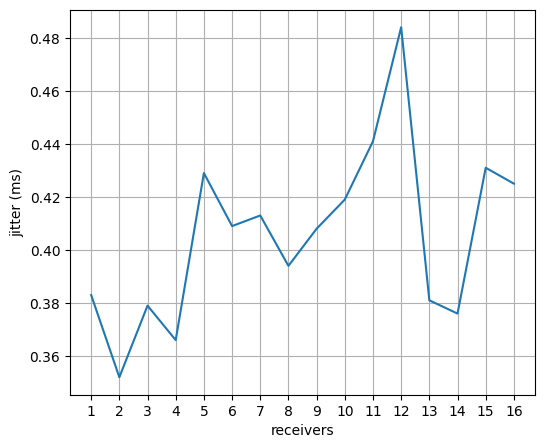

In [85]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
jitters = [383, 352, 379, 366, 429, 409, 413, 394, 408, 419, 441, 484, 381, 376, 431, 425]
y = [(x / 1000) for x in jitters]
x = [x for x in range(1,17)]
print(f'mean jitter: {mean(jitters) / 1000} ms')

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, y)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('jitter (ms)')

plt.show()

## 16 all-to-all -C 1000 -c 6500 UDP bw=1Gbit/s - hosts;  bw=10Gbit/s - switches

mean delays: 0.4733125 ms


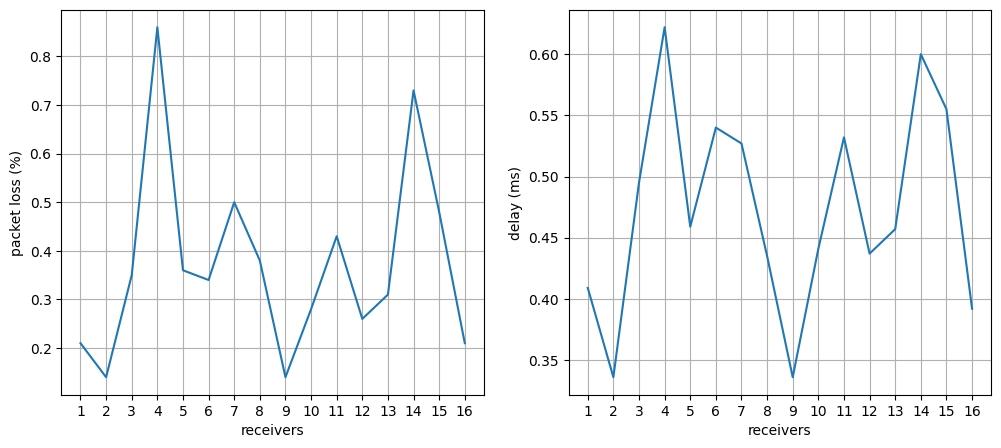

In [86]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
delays = [409, 336, 495, 622, 459, 540, 527, 435, 336, 441, 532, 437, 457, 600, 555, 392]
y = [(x / 1000) for x in delays]
x = [x for x in range(1,17)]
pl = [0.21, 0.14, 0.35, 0.86, 0.36, 0.34, 0.5, 0.38, 0.14, 0.28, 0.43, 0.26, 0.31, 0.73, 0.48, 0.21]
print(f'mean delays: {mean(delays) / 1000} ms')

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, pl)
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('packet loss (%)')

ax[1].plot(x, y)
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('delay (ms)')

# ax[0].plot(x, y)

# ax[0].grid()
# ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
# xlabels = ax[0].xaxis.get_ticklabels()
# ylabels = ax[0].yaxis.get_ticklabels()

# ax[0].set_xlabel('receivers')
# ax[0].set_ylabel('delay (ms)')

# ax[1].plot(x, pl)
plt.show()

mean jitter: 0.1738125 ms


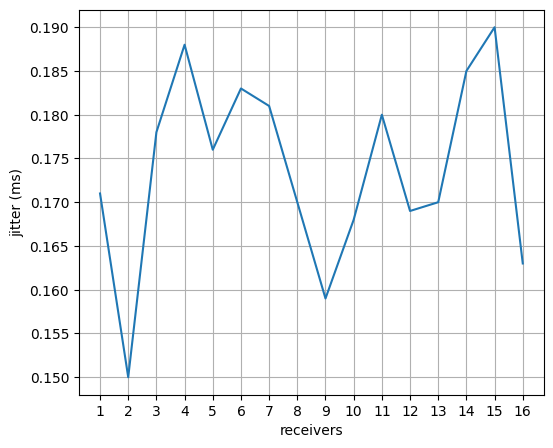

In [87]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
jitters = [171, 150, 178, 188, 176, 183, 181, 170, 159, 168, 180, 169, 170, 185, 190, 163]
y = [(x / 1000) for x in jitters]
x = [x for x in range(1,17)]
print(f'mean jitter: {mean(jitters) / 1000} ms')

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, y)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('jitter (ms)')

plt.show()

## Объединенная информация на графиках

mean jitter: 0.405625 ms
mean jitter: 0.1738125 ms


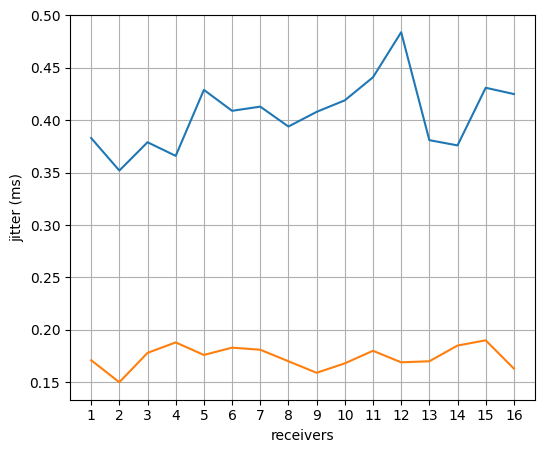

In [14]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
jitters1 = [383, 352, 379, 366, 429, 409, 413, 394, 408, 419, 441, 484, 381, 376, 431, 425]
jitters10 = [171, 150, 178, 188, 176, 183, 181, 170, 159, 168, 180, 169, 170, 185, 190, 163]
y1 = [(x / 1000) for x in jitters1]
y10 = [(x / 1000) for x in jitters10]
x = [x for x in range(1,17)]
print(f'mean jitter: {mean(jitters1) / 1000} ms')
print(f'mean jitter: {mean(jitters10) / 1000} ms')

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, y1)
ax.plot(x, y10)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('jitter (ms)')

plt.show()

mean delays: 1.2715625 ms
mean delays: 0.4733125 ms


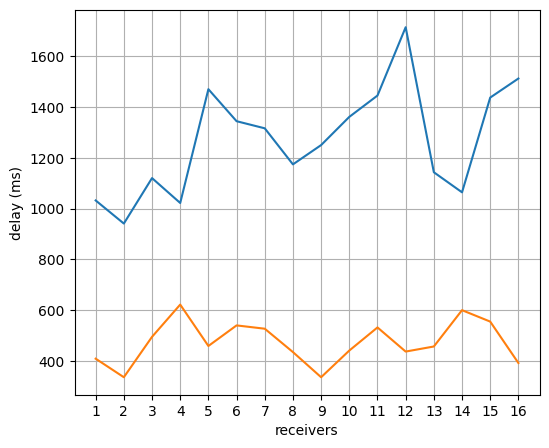

In [20]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
delays1 = [1032, 941, 1120, 1022, 1470, 1344, 1316, 1174, 1250, 1361, 1445, 1714, 1143, 1064, 1437, 1512]
delays10 = [409, 336, 495, 622, 459, 540, 527, 435, 336, 441, 532, 437, 457, 600, 555, 392]
y1 = [(x / 1000) for x in delays1]
y10 = [(x / 1000) for x in delays10]
x = [x for x in range(1,17)]
pl = [0.21, 0.14, 0.35, 0.86, 0.36, 0.34, 0.5, 0.38, 0.14, 0.28, 0.43, 0.26, 0.31, 0.73, 0.48, 0.21]
print(f'mean delays: {mean(delays1) / 1000} ms')
print(f'mean delays: {mean(delays10) / 1000} ms')

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, delays1)
ax.plot(x, delays10)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('delay (ms)')

plt.show()

mean packet loss: 1.184375 %
mean packet loss: 0.37375 %


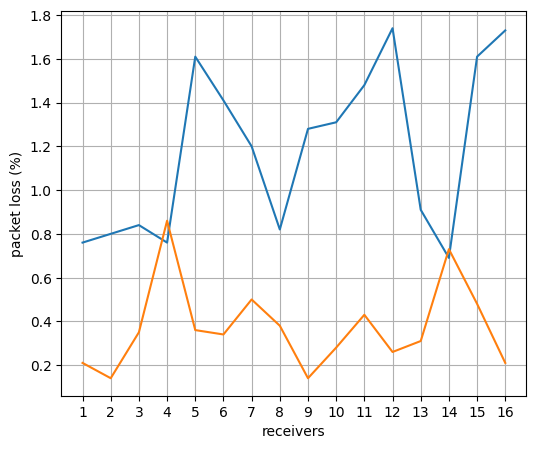

In [25]:
from statistics import mean
pl1 = [0.76, 0.8, 0.84, 0.76, 1.61, 1.41, 1.2, 0.82, 1.28, 1.31, 1.48, 1.74, 0.91, 0.69, 1.61, 1.73]
pl10 = [0.21, 0.14, 0.35, 0.86, 0.36, 0.34, 0.5, 0.38, 0.14, 0.28, 0.43, 0.26, 0.31, 0.73, 0.48, 0.21]
x = [x for x in range(1,17)]
print(f'mean packet loss: {mean(pl1)} %')
print(f'mean packet loss: {mean(pl10)} %')

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, pl1)
ax.plot(x, pl10)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss (%)')

plt.show()

### trash

In [12]:
pl = [0.29, 0.37, 1.36, 2.08, 1.94, 0.25, 1.3, 0.13, 3.75, 2.46, 0.42, 0.19, 1.78, 1.0, 2.49, 1.36, 0.72, 0.14, 1.74, 1.62, 0.46, 0.8, 1.54, 0.1, 1.57, 0.71, 3.95, 1.97, 1.69, 1.84, 0.67, 2.18, 0.82, 0.13, 1.26, 2.31, 0.61, 3.5, 5.04, 2.17, 0.51, 1.57, 3.02, 0.62, 2.1, 0.13, 3.37, 2.02, 0.21, 1.57, 0.71, 1.1, 1.75, 0.1, 0.11, 3.75, 0.24, 1.05, 0.43, 0.91, 2.22, 6.44, 0.8, 0.17, 1.66, 1.58, 0.12, 0.0, 0.88, 2.68, 1.32, 1.63, 1.64, 1.37, 3.34, 0.8, 0.87, 0.81, 1.22, 0.71, 0.93, 0.23, 0.55, 2.45, 0.84, 0.83, 0.65, 3.51, 5.87, 1.78, 3.1, 1.18, 4.56, 0.1, 0.12, 4.53, 0.71, 0.18, 2.27, 0.09, 0.82, 0.15, 2.29, 0.86, 0.35, 2.59, 1.78, 0.96, 0.75, 2.28, 2.02, 1.9, 0.37, 4.95, 1.22, 5.9, 0.23, 0.7, 2.07, 3.76, 4.1, 2.52, 1.03, 1.27, 2.76, 2.91, 0.35, 0.68, 1.52, 0.2, 3.39, 0.32, 2.18, 1.4, 0.45, 6.67, 0.31, 0.11, 0.86, 0.38, 0.08, 1.04, 0.15, 2.66, 2.13, 0.78, 1.84, 0.4, 0.0, 0.78, 0.43, 1.78, 1.27, 1.1, 0.11, 0.37, 1.91, 3.14, 2.17, 0.96, 1.48, 1.25, 0.34, 0.6, 0.16, 0.09, 5.72, 0.6, 0.48, 2.35, 1.7, 1.92, 5.01, 1.3, 0.77, 0.63, 0.0, 1.05, 0.25, 0.12, 0.83, 0.84, 0.09, 3.21, 2.17, 3.26, 1.64, 1.87, 1.91, 0.69, 0.85, 2.14]
x = [i for i in range(1, len(pl)+1)]
m = [1.1 for _ in range(1, len(pl)+1)]

In [14]:
_, ax = plt.subplots(figsize=(12, 5), ncols=1)

ax.plot(x, pl)
ax.plot(x, m)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss')

plt.show()

In [15]:
pl.sort()

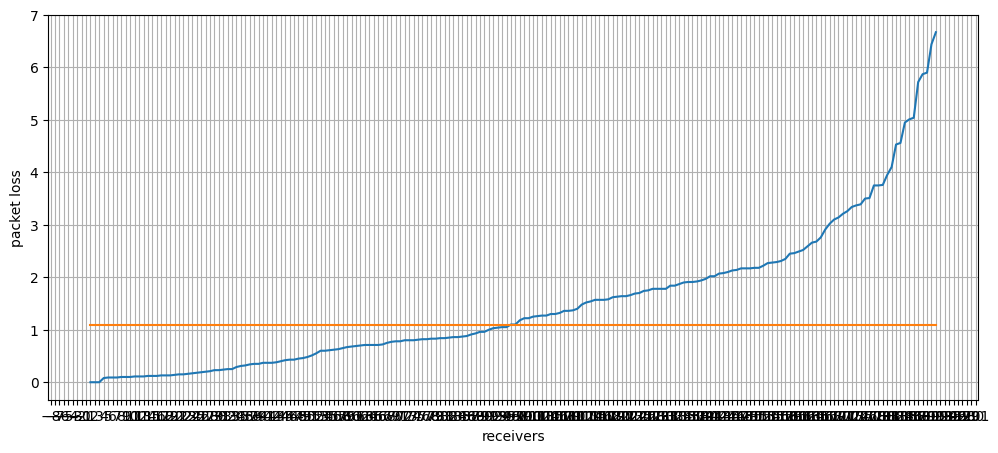

In [16]:
_, ax = plt.subplots(figsize=(12, 5), ncols=1)

ax.plot(x, pl)
ax.plot(x, m)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss')

plt.show()

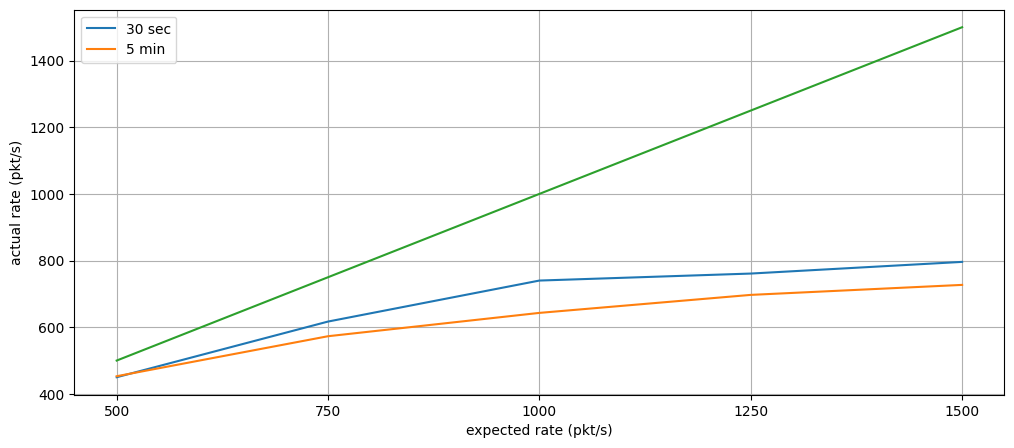

In [21]:
_, ax = plt.subplots(figsize=(12, 5), ncols=1)

s1,= ax.plot([500, 750, 1000, 1250, 1500], [450, 617, 740, 761, 796], label='30 sec') # 30 sec
s2, = ax.plot([500, 750, 1000, 1250, 1500], [453, 573, 643, 697, 727], label='5 min')
ax.plot([500, 750, 1000, 1250, 1500], [500, 750, 1000, 1250, 1500])

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()
ax.legend(handles=[s1, s2])

ax.set_xlabel('expected rate (pkt/s)')
ax.set_ylabel('actual rate (pkt/s)')

plt.show()

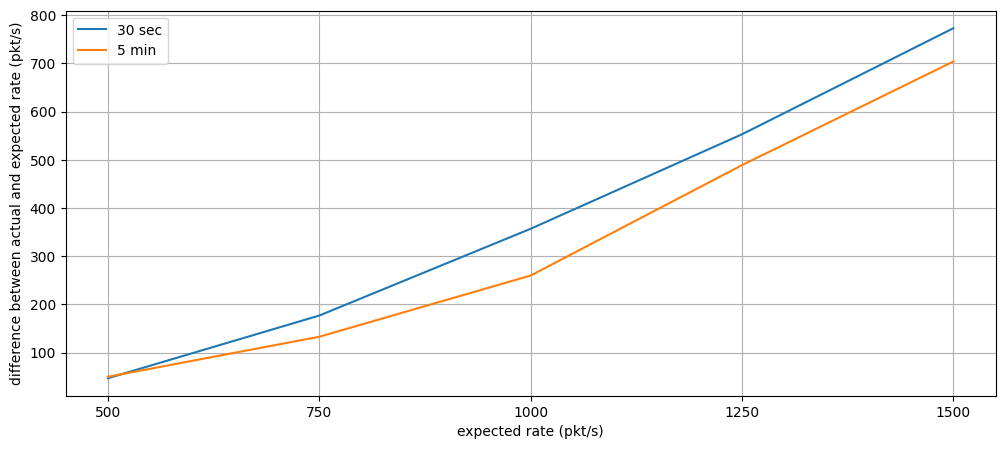

In [23]:
_, ax = plt.subplots(figsize=(12, 5), ncols=1)

x = [500, 750, 1000, 1250, 1500]

y = [453, 573, 643, 697, 727]
s1, = ax.plot([500, 750, 1000, 1250, 1500], [x[i]-y[i] for i in range(len(x))], label='30 sec')

y = [450, 617, 740, 761, 796] # 30 sec
s2, = ax.plot([500, 750, 1000, 1250, 1500], [x[i]-y[i] for i in range(len(x))], label='5 min')

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()
ax.legend(handles=[s1, s2])

ax.set_xlabel('expected rate (pkt/s)')
ax.set_ylabel('difference between actual and expected rate (pkt/s)')

plt.show()

### Определение весовой функции

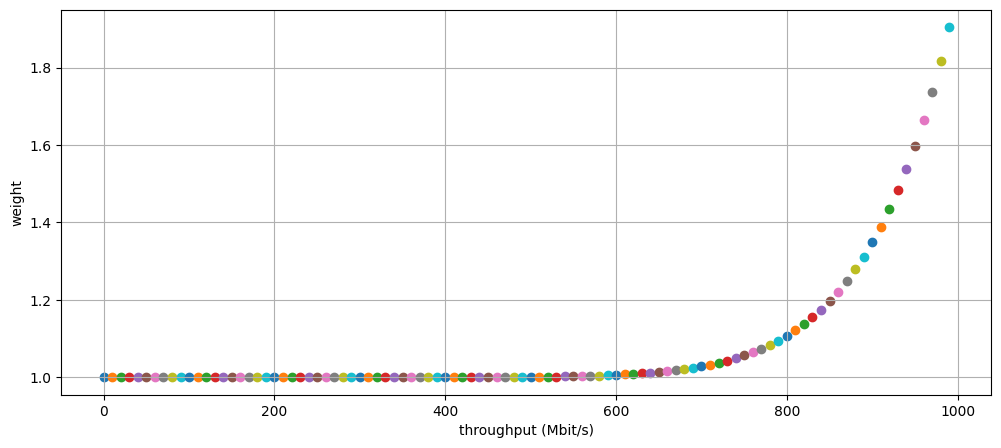

In [12]:
_, ax = plt.subplots(figsize=(12, 5), ncols=1)


#s1, = ax.plot([500, 750, 1000, 1250, 1500], [x[i]-y[i] for i in range(len(x))], label='30 sec')
for x in range(0, 1000, 10):
    y = (x / 1000)**2 + 1
    plt.scatter(x,y)

ax.grid()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()
#ax.legend(handles=[s1, s2])

ax.set_xlabel('throughput (Mbit/s)')
ax.set_ylabel('weight')

plt.show()

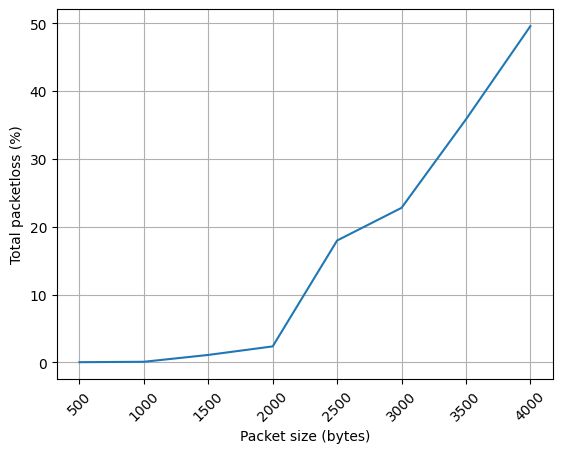

In [4]:
# 1Gbit/s все links 80 хостов (четный передает нечетному и наоборот)
y = [0.03, 0.09, 1.1, 2.36, 17.98, 22.8, 35.85, 49.6]
x = [500,1000,1500,2000,2500,3000,3500,4000]


_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

# VM

## 1 Gbit/s

### 16 hosts

In [35]:
# 1Gbit/s все links 80 хостов (четный передает нечетному и наоборот)
y = [0.02, 0.0, 0.3, 0.81, 0.63, 0.51, 1.34, 0.2, 0.96, 0.92, 1.15, 0.0]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]


_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

In [16]:
from statistics import mean
pl = [1.04, 1.05, 1.05, 1.05, 1.14, 1.04, 1.05, 1.05, 1.04, 1.05, 1.02, 2.57, 1.05, 1.05, 1.05, 1.04]
x = [x for x in range(1,17)]

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, pl)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss (%)')

plt.show()

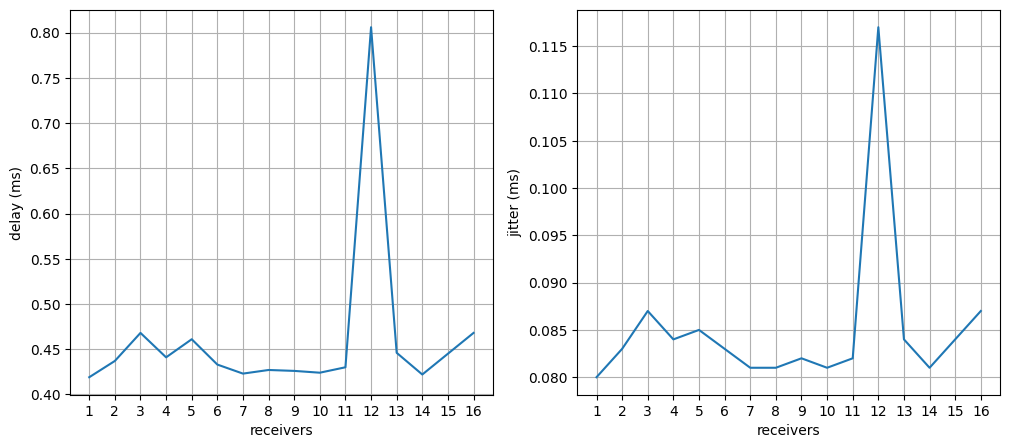

In [15]:
from statistics import mean
#delays = [0.112, 0.04, 0.26, 0.48, 0.38, 0.32, 0.58, 0.23, 0.45, 0.41, 0.46, 0.21]
#jitters = [0.01, 0.02, 0.03, 0.04, 0.05, 0.05, 0.08, 0.06, 0.08, 0.08, 0.08, 0.06]
delays = [0.419, 0.437, 0.46799999999999997, 0.441, 0.46099999999999997, 0.433, 0.423, 0.42700000000000005, 0.426, 0.424, 0.43, 0.8059999999999999, 0.446, 0.422, 0.44499999999999995, 0.46799999999999997]
jitters = [0.08, 0.083, 0.087, 0.08399999999999999, 0.085, 0.083, 0.081, 0.081, 0.082, 0.081, 0.082, 0.11699999999999999, 0.08399999999999999, 0.081, 0.08399999999999999, 0.087]
x = [x for x in range(1,17)]

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, delays)
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('delay (ms)')

ax[1].plot(x, jitters)
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('jitter (ms)')

plt.show()

### 80 hosts

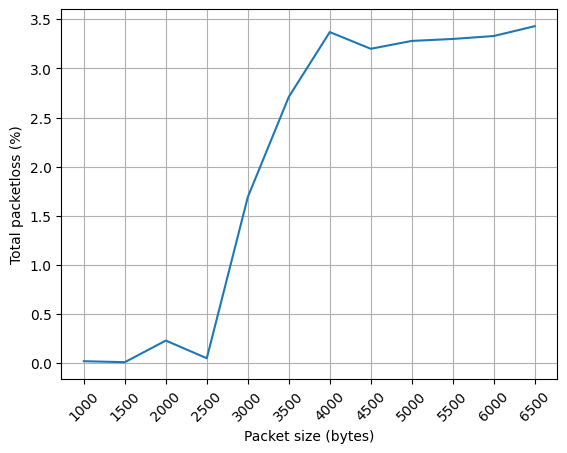

In [11]:
# 1Gbit/s все links 80 хостов (четный передает нечетному и наоборот)
y = [0.02, 0.01, 0.23, 0.05, 1.69, 2.71, 3.37, 3.2, 3.28, 3.3, 3.33, 3.43]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]


_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

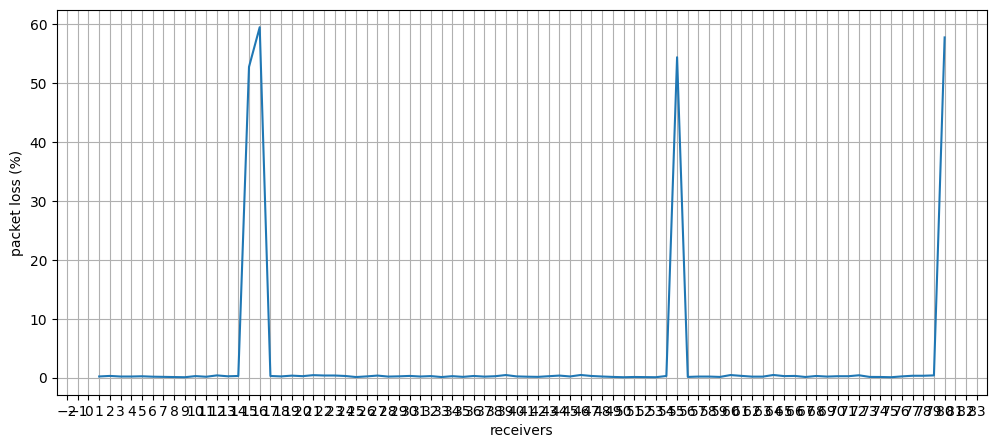

In [19]:
from statistics import mean
pl = [0.2, 0.29, 0.19, 0.19, 0.23, 0.16, 0.13, 0.1, 0.07, 0.26, 0.15, 0.38, 0.23, 0.28, 52.77, 59.51, 0.28, 0.21, 0.34, 0.25, 0.42, 0.36, 0.36, 0.28, 0.1, 0.21, 0.35, 0.18, 0.22, 0.29, 0.19, 0.26, 0.1, 0.25, 0.13, 0.28, 0.17, 0.24, 0.44, 0.21, 0.16, 0.13, 0.24, 0.35, 0.2, 0.45, 0.28, 0.19, 0.12, 0.07, 0.11, 0.09, 0.07, 0.28, 54.41, 0.12, 0.18, 0.18, 0.12, 0.44, 0.3, 0.17, 0.17, 0.45, 0.26, 0.29, 0.11, 0.28, 0.18, 0.24, 0.24, 0.4, 0.12, 0.11, 0.07, 0.21, 0.32, 0.32, 0.38, 57.78]
x = [x for x in range(1,81)]

_, ax = plt.subplots(figsize=(12, 5), ncols=1)

ax.plot(x, pl)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss (%)')

plt.show()

median delay: 0.9319999999999999
median jitter: 0.356


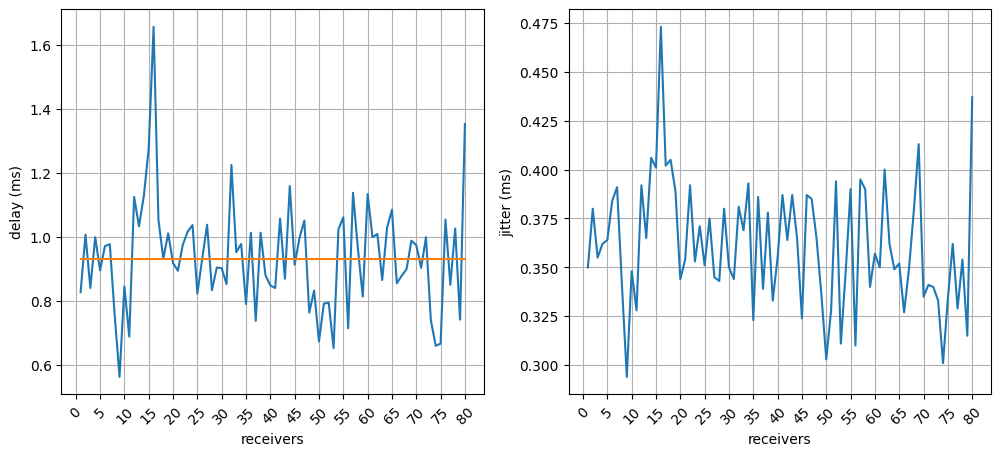

In [75]:
from statistics import median
delays = [0.8270000000000001, 1.0070000000000001, 0.8400000000000001, 0.9990000000000001, 0.895, 0.971, 0.977, 0.756, 0.562, 0.8450000000000001, 0.6880000000000001, 1.125, 1.0330000000000001, 1.1280000000000001, 1.278, 1.657, 1.053, 0.9319999999999999, 1.011, 0.9179999999999999, 0.894, 0.975, 1.016, 1.037, 0.823, 0.9319999999999999, 1.038, 0.833, 0.9039999999999999, 0.902, 0.852, 1.2249999999999999, 0.9520000000000001, 0.9779999999999999, 0.79, 1.013, 0.737, 1.013, 0.88, 0.848, 0.8400000000000001, 1.057, 0.869, 1.159, 0.9129999999999999, 0.9970000000000001, 1.0510000000000002, 0.763, 0.832, 0.673, 0.791, 0.794, 0.652, 1.024, 1.0610000000000002, 0.714, 1.138, 0.963, 0.8130000000000001, 1.1340000000000001, 0.9990000000000001, 1.009, 0.865, 1.029, 1.085, 0.855, 0.878, 0.8989999999999999, 0.988, 0.9740000000000001, 0.903, 0.9990000000000001, 0.739, 0.6589999999999999, 0.666, 1.054, 0.85, 1.026, 0.741, 1.353]
jitters = [0.35, 0.38, 0.355, 0.36200000000000004, 0.364, 0.384, 0.391, 0.34099999999999997, 0.294, 0.348, 0.328, 0.392, 0.365, 0.406, 0.40099999999999997, 0.47300000000000003, 0.402, 0.40499999999999997, 0.389, 0.34400000000000003, 0.354, 0.392, 0.35300000000000004, 0.371, 0.35100000000000003, 0.375, 0.345, 0.34299999999999997, 0.38, 0.35, 0.34400000000000003, 0.381, 0.36900000000000005, 0.393, 0.323, 0.386, 0.339, 0.378, 0.333, 0.355, 0.38699999999999996, 0.364, 0.38699999999999996, 0.365, 0.324, 0.38699999999999996, 0.38499999999999995, 0.365, 0.33599999999999997, 0.303, 0.328, 0.39399999999999996, 0.311, 0.348, 0.39, 0.31, 0.395, 0.39, 0.34, 0.357, 0.35, 0.4, 0.36200000000000004, 0.34900000000000003, 0.352, 0.32699999999999996, 0.34900000000000003, 0.379, 0.41300000000000003, 0.335, 0.34099999999999997, 0.34, 0.333, 0.301, 0.33399999999999996, 0.36200000000000004, 0.32899999999999996, 0.354, 0.315, 0.437]
x = [x for x in range(1,81)]
print(f'median delay: {median(delays)}')
print(f'median jitter: {median(jitters)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, delays)
ax[0].plot(x, [median(delays) for _ in range(1, 81)])
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('delay (ms)')

ax[1].plot(x, jitters)
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('jitter (ms)')

plt.show()

## 10 Gbit/s

### 16 hosts

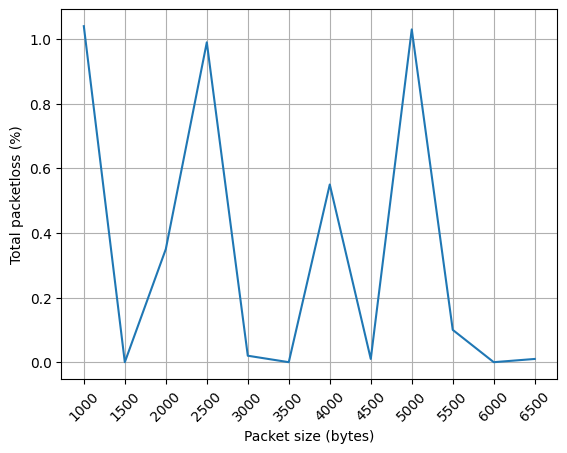

In [34]:
# 1Gbit/s все links 80 хостов (четный передает нечетному и наоборот)
y = [1.04, 0.0, 0.35, 0.99, 0.02, 0.0, 0.55, 0.01, 1.03, 0.1, 0.0, 0.01]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]


_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

In [ ]:
from statistics import mean
pl = []
x = [x for x in range(1,17)]

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, pl)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss (%)')

plt.show()

In [ ]:
from statistics import mean
#delays = [0.112, 0.04, 0.26, 0.48, 0.38, 0.32, 0.58, 0.23, 0.45, 0.41, 0.46, 0.21]
#jitters = [0.01, 0.02, 0.03, 0.04, 0.05, 0.05, 0.08, 0.06, 0.08, 0.08, 0.08, 0.06]
delays = []
jitters = []
x = [x for x in range(1,17)]

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, delays)
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('delay (ms)')

ax[1].plot(x, jitters)
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('jitter (ms)')

plt.show()

### 80 hosts

In [13]:
# 1Gbit/s все links 80 хостов (четный передает нечетному и наоборот)
y = [0.43, 0.1, 0.19, 0.38, 0.04, 0.22, 0.02, 1.06, 1.0, 0.04, 2.34, 1.76]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]


_, ax1 = plt.subplots(ncols=1)
ax1.plot(x, y)

ax1.set_xlabel('Packet size (bytes)', fontsize=10)
ax1.grid()
ax1.set_ylabel('Total packetloss (%)',fontsize=10)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax1.xaxis.get_ticklabels()
ylabels = ax1.yaxis.get_ticklabels()

for line in ylabels:
    line.set_fontsize(10)

for label in xlabels:
    label.set_rotation(45)
    label.set_fontsize(10)

plt.show()

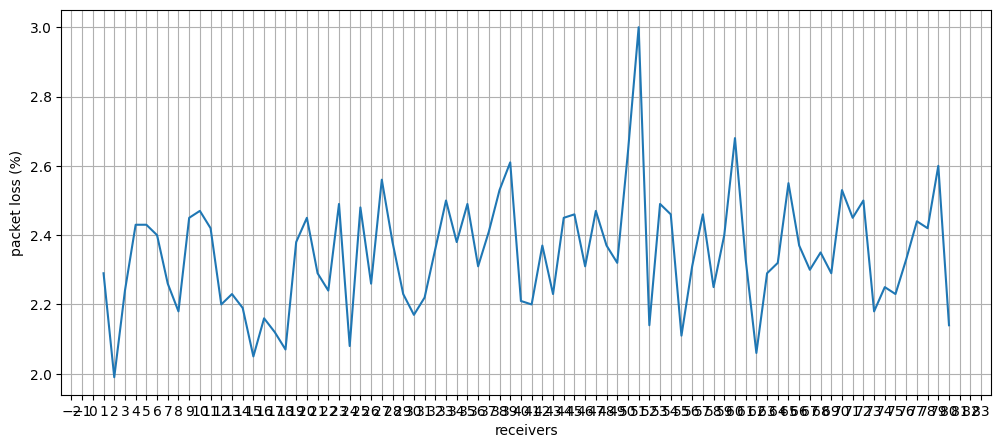

In [23]:
from statistics import mean
pl = [2.29, 1.99, 2.24, 2.43, 2.43, 2.4, 2.26, 2.18, 2.45, 2.47, 2.42, 2.2, 2.23, 2.19, 2.05, 2.16, 2.12, 2.07, 2.38, 2.45, 2.29, 2.24, 2.49, 2.08, 2.48, 2.26, 2.56, 2.38, 2.23, 2.17, 2.22, 2.36, 2.5, 2.38, 2.49, 2.31, 2.41, 2.53, 2.61, 2.21, 2.2, 2.37, 2.23, 2.45, 2.46, 2.31, 2.47, 2.37, 2.32, 2.64, 3.0, 2.14, 2.49, 2.46, 2.11, 2.31, 2.46, 2.25, 2.4, 2.68, 2.33, 2.06, 2.29, 2.32, 2.55, 2.37, 2.3, 2.35, 2.29, 2.53, 2.45, 2.5, 2.18, 2.25, 2.23, 2.33, 2.44, 2.42, 2.6, 2.14]
x = [x for x in range(1,81)]

_, ax = plt.subplots(figsize=(12, 5), ncols=1)

ax.plot(x, pl)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

ax.set_xlabel('receivers')
ax.set_ylabel('packet loss (%)')

plt.show()

In [24]:
from statistics import mean
delays = [4.069999999999999, 3.738, 3.941, 4.167, 3.872, 3.8040000000000003, 3.706, 3.8289999999999997, 3.879, 4.045, 3.913, 3.827, 3.9430000000000005, 3.997, 3.68, 3.528, 3.59, 3.595, 3.6870000000000003, 3.9899999999999998, 3.798, 3.6380000000000003, 3.771, 3.822, 3.895, 3.6159999999999997, 3.832, 4.018, 3.888, 3.614, 3.806, 3.987, 4.169, 3.934, 4.266, 3.837, 3.713, 4.082, 3.9029999999999996, 3.8019999999999996, 3.6519999999999997, 4.039, 3.886, 4.168, 4.029, 3.528, 4.194, 3.785, 4.122, 4.386, 3.9439999999999995, 3.7030000000000003, 4.1419999999999995, 3.9699999999999998, 3.533, 4.008, 3.732, 3.878, 3.741, 4.303999999999999, 4.009, 3.542, 3.965, 3.807, 4.355, 3.906, 3.776, 3.671, 3.834, 4.271, 3.9859999999999998, 4.094, 3.8890000000000002, 3.817, 3.713, 4.002000000000001, 4.276000000000001, 3.987, 4.083, 3.494]
jitters = [0.43, 0.399, 0.417, 0.439, 0.41, 0.40499999999999997, 0.39399999999999996, 0.412, 0.414, 0.425, 0.419, 0.41, 0.419, 0.423, 0.39399999999999996, 0.376, 0.383, 0.386, 0.392, 0.421, 0.402, 0.391, 0.40099999999999997, 0.40900000000000003, 0.414, 0.38699999999999996, 0.40700000000000003, 0.43, 0.41300000000000003, 0.39, 0.40499999999999997, 0.425, 0.441, 0.417, 0.45, 0.40499999999999997, 0.398, 0.429, 0.41300000000000003, 0.404, 0.391, 0.431, 0.41100000000000003, 0.444, 0.42700000000000005, 0.377, 0.44, 0.402, 0.437, 0.46, 0.414, 0.393, 0.437, 0.417, 0.378, 0.424, 0.395, 0.41, 0.40299999999999997, 0.451, 0.423, 0.38, 0.419, 0.40900000000000003, 0.457, 0.41800000000000004, 0.40299999999999997, 0.395, 0.40700000000000003, 0.449, 0.423, 0.433, 0.415, 0.40499999999999997, 0.39599999999999996, 0.424, 0.451, 0.424, 0.432, 0.375]
x = [x for x in range(1,81)]

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, delays)
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('delay (ms)')

ax[1].plot(x, jitters)
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('jitter (ms)')

plt.show()

# For paper

## 16 hosts 1Gbit and 10 Gbit packet loss depends on packet size

In [48]:
from statistics import mean
pl1 = [0.02, 0.0, 0.3, 0.81, 0.63, 0.51, 1.39, 0.2, 0.96, 0.92, 1.15, 0.0]
pl10 = [0.9, 0.0, 0.35, 0.99, 0.02, 0.0, 0.55, 0.01, 1.03, 0.1, 0.0, 0.01]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(500))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()
    
ax[0].plot(x, sorted(pl1))
ax[0].set_xlabel('packet size (byte)')
ax[0].set_ylabel('packet loss (%)')

ax[1].plot(x, sorted(pl10))
ax[1].set_xlabel('packet size (byte)')
ax[1].set_ylabel('packet loss (%)')

plt.show()

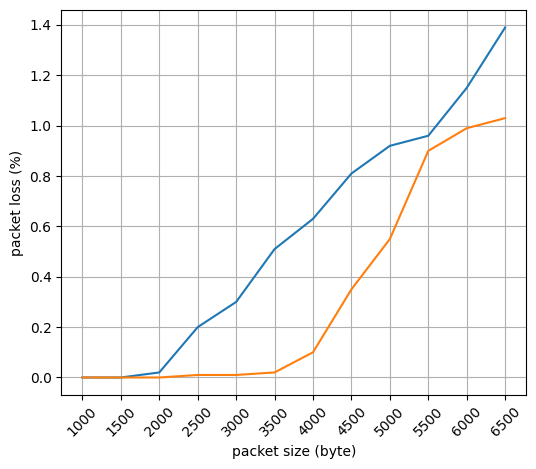

In [65]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
pl1 = [0.02, 0.0, 0.3, 0.81, 0.63, 0.51, 1.39, 0.2, 0.96, 0.92, 1.15, 0.0]
pl10 = [0.9, 0.0, 0.35, 0.99, 0.02, 0.0, 0.55, 0.01, 1.03, 0.1, 0.0, 0.01]
s1 = sorted(pl1)
s10 = sorted(pl10)
y = [abs(s1[i]-s10[i]) for i in range(len(s1))]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, s1)
ax.plot(x, s10)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

for label in xlabels:
        label.set_rotation(45)
ax.set_xlabel('packet size (byte)')
ax.set_ylabel('packet loss (%)')

plt.show()

## 80 hosts 1Gbit and 10 Gbit packet loss depends on packet size

In [49]:
from statistics import mean
pl1 = [0.02, 0.01, 0.23, 0.05, 1.69, 2.71, 3.37, 3.2, 3.28, 3.3, 3.33, 3.43]
pl10 = [0.43, 0.1, 0.19, 0.38, 0.04, 0.22, 0.02, 1.06, 1.0, 0.04, 2.34, 1.76]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(500))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, sorted(pl1))
ax[0].set_xlabel('packet size (byte)')
ax[0].set_ylabel('packet loss (%)')

ax[1].plot(x, sorted(pl10))
ax[1].set_xlabel('packet size (byte)')
ax[1].set_ylabel('packet loss (%)')

plt.show()

In [66]:
from statistics import mean
#y = [322, 280, 318, 322, 273, 343, 332, 295, 370, 293, 349, 496, 340, 317, 376, 384]
pl1 = [0.02, 0.01, 0.23, 0.05, 1.69, 2.71, 3.37, 3.2, 3.28, 3.3, 3.33, 3.43]
pl10 = [0.43, 0.1, 0.19, 0.38, 0.04, 0.22, 0.02, 1.06, 1.0, 0.04, 2.34, 1.76]
s1 = sorted(pl1)
s10 = sorted(pl10)
y = [abs(s1[i]-s10[i]) for i in range(len(s1))]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

_, ax = plt.subplots(figsize=(6, 5), ncols=1)

ax.plot(x, s1)
ax.plot(x, s10)

ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
xlabels = ax.xaxis.get_ticklabels()
ylabels = ax.yaxis.get_ticklabels()

for label in xlabels:
        label.set_rotation(45)
ax.set_xlabel('packet size (byte)')
ax.set_ylabel('packet loss (%)')

plt.show()

## 16 hosts delay while packet size is max for 1 gbit and 10 gbit

median delay: 0.5775
median delay: 0.328


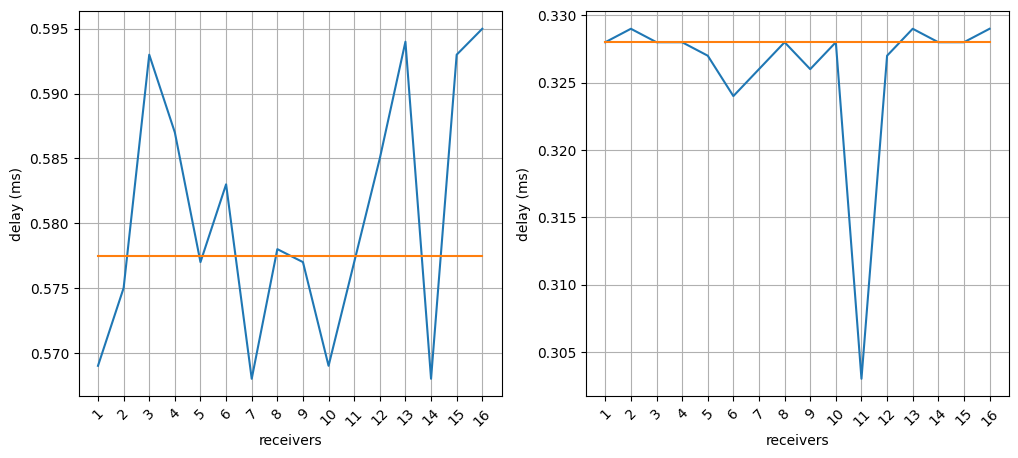

In [128]:
from statistics import median
delays1 = [0.569, 0.575, 0.593, 0.587, 0.5770000000000001, 0.583, 0.5680000000000001, 0.578, 0.5770000000000001, 0.569, 0.5770000000000001, 0.585, 0.594, 0.5680000000000001, 0.593, 0.5950000000000001]
delays10 = [0.328, 0.32899999999999996, 0.328, 0.328, 0.32699999999999996, 0.324, 0.326, 0.328, 0.326, 0.328, 0.303, 0.32699999999999996, 0.32899999999999996, 0.328, 0.328, 0.32899999999999996]
x = [x for x in range(1,17)]
print(f'median delay: {median(delays1)}')
print(f'median delay: {median(delays10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, delays1)
ax[0].plot(x, [median(delays1) for _ in range(1, 17)])
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('delay (ms)')
#ax[0].set_ylim([0.35, 0.55])

ax[1].plot(x, delays10)
ax[1].plot(x, [median(delays10) for _ in range(1, 17)])
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('delay (ms)')
#ax[1].set_ylim([0.32, 0.34])

plt.show()

## 16 hosts jitter while packet size is max for 1 gbit and 10 gbit

median delay: 0.079
median delay: 0.028


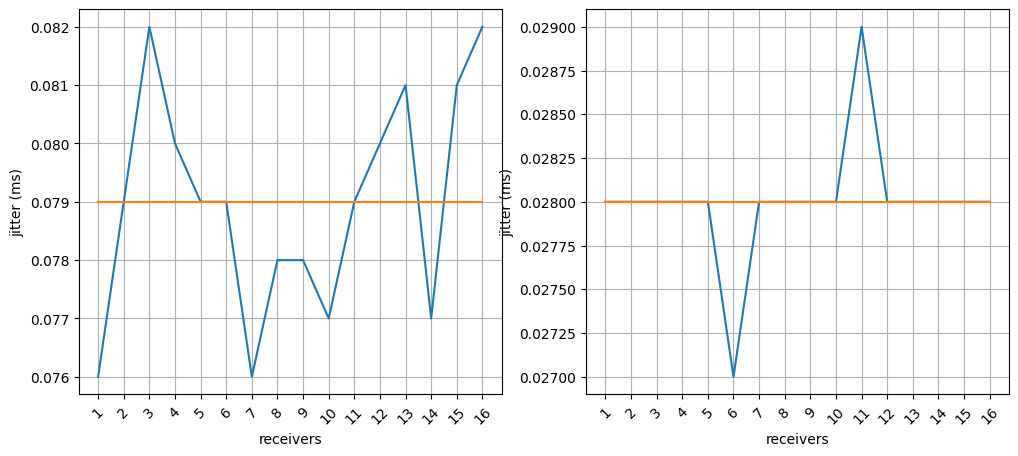

In [130]:
from statistics import median
jitters1 = [0.076, 0.079, 0.082, 0.08, 0.079, 0.079, 0.076, 0.078, 0.078, 0.077, 0.079, 0.08, 0.081, 0.077, 0.081, 0.082]
jitters10 = [0.028, 0.028, 0.028, 0.028, 0.028, 0.027, 0.028, 0.028, 0.028, 0.028, 0.029, 0.028, 0.028, 0.028, 0.028, 0.028]
x = [x for x in range(1,17)]
print(f'median delay: {median(jitters1)}')
print(f'median delay: {median(jitters10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(1))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, jitters1)
ax[0].plot(x, [median(jitters1) for _ in range(1, 17)])
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('jitter (ms)')

ax[1].plot(x, jitters10)
ax[1].plot(x, [median(jitters10) for _ in range(1, 17)])
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('jitter (ms)')

plt.show()

## 80 hosts delay while packet size is max for 1 gbit and 10 gbit

median delay: 0.9319999999999999
median delay: 3.887


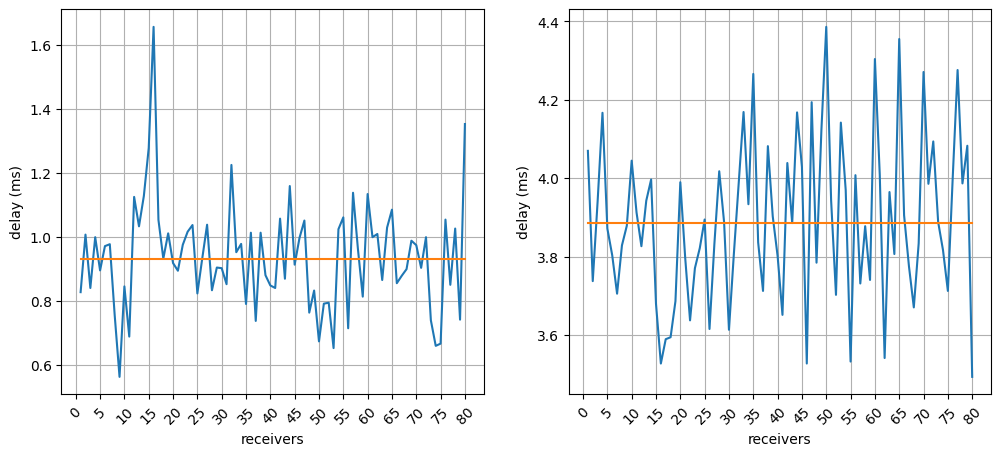

In [81]:
from statistics import median
delays1 = [0.8270000000000001, 1.0070000000000001, 0.8400000000000001, 0.9990000000000001, 0.895, 0.971, 0.977, 0.756, 0.562, 0.8450000000000001, 0.6880000000000001, 1.125, 1.0330000000000001, 1.1280000000000001, 1.278, 1.657, 1.053, 0.9319999999999999, 1.011, 0.9179999999999999, 0.894, 0.975, 1.016, 1.037, 0.823, 0.9319999999999999, 1.038, 0.833, 0.9039999999999999, 0.902, 0.852, 1.2249999999999999, 0.9520000000000001, 0.9779999999999999, 0.79, 1.013, 0.737, 1.013, 0.88, 0.848, 0.8400000000000001, 1.057, 0.869, 1.159, 0.9129999999999999, 0.9970000000000001, 1.0510000000000002, 0.763, 0.832, 0.673, 0.791, 0.794, 0.652, 1.024, 1.0610000000000002, 0.714, 1.138, 0.963, 0.8130000000000001, 1.1340000000000001, 0.9990000000000001, 1.009, 0.865, 1.029, 1.085, 0.855, 0.878, 0.8989999999999999, 0.988, 0.9740000000000001, 0.903, 0.9990000000000001, 0.739, 0.6589999999999999, 0.666, 1.054, 0.85, 1.026, 0.741, 1.353]
delays10 = [4.069999999999999, 3.738, 3.941, 4.167, 3.872, 3.8040000000000003, 3.706, 3.8289999999999997, 3.879, 4.045, 3.913, 3.827, 3.9430000000000005, 3.997, 3.68, 3.528, 3.59, 3.595, 3.6870000000000003, 3.9899999999999998, 3.798, 3.6380000000000003, 3.771, 3.822, 3.895, 3.6159999999999997, 3.832, 4.018, 3.888, 3.614, 3.806, 3.987, 4.169, 3.934, 4.266, 3.837, 3.713, 4.082, 3.9029999999999996, 3.8019999999999996, 3.6519999999999997, 4.039, 3.886, 4.168, 4.029, 3.528, 4.194, 3.785, 4.122, 4.386, 3.9439999999999995, 3.7030000000000003, 4.1419999999999995, 3.9699999999999998, 3.533, 4.008, 3.732, 3.878, 3.741, 4.303999999999999, 4.009, 3.542, 3.965, 3.807, 4.355, 3.906, 3.776, 3.671, 3.834, 4.271, 3.9859999999999998, 4.094, 3.8890000000000002, 3.817, 3.713, 4.002000000000001, 4.276000000000001, 3.987, 4.083, 3.494]
x = [x for x in range(1,81)]
print(f'median delay: {median(delays1)}')
print(f'median delay: {median(delays10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, delays1)
ax[0].plot(x, [median(delays1) for _ in range(1, 81)])
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('delay (ms)')

ax[1].plot(x, delays10)
ax[1].plot(x, [median(delays10) for _ in range(1, 81)])
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('delay (ms)')

plt.show()

## 80 hosts jitter while packet size is max for 1 gbit and 10 gbit

median delay: 0.356
median delay: 0.41300000000000003


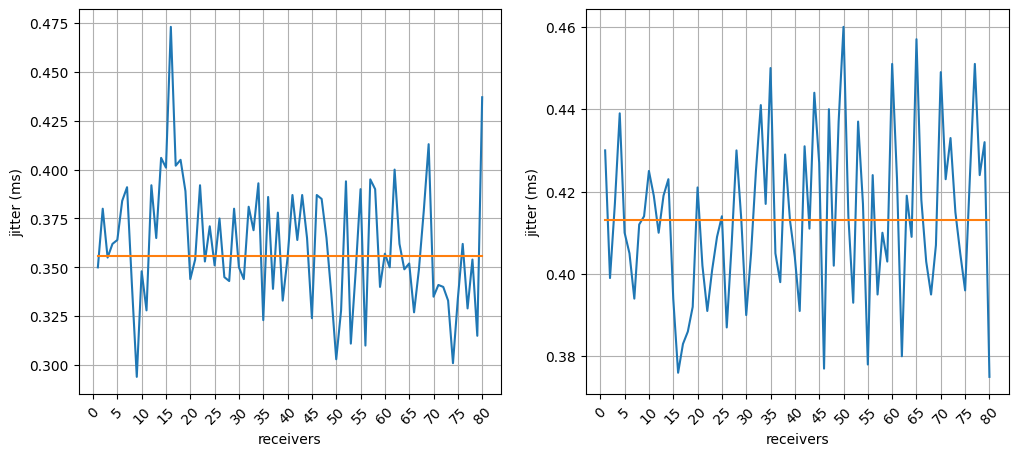

In [110]:
from statistics import median
jitters1 = [0.35, 0.38, 0.355, 0.36200000000000004, 0.364, 0.384, 0.391, 0.34099999999999997, 0.294, 0.348, 0.328, 0.392, 0.365, 0.406, 0.40099999999999997, 0.47300000000000003, 0.402, 0.40499999999999997, 0.389, 0.34400000000000003, 0.354, 0.392, 0.35300000000000004, 0.371, 0.35100000000000003, 0.375, 0.345, 0.34299999999999997, 0.38, 0.35, 0.34400000000000003, 0.381, 0.36900000000000005, 0.393, 0.323, 0.386, 0.339, 0.378, 0.333, 0.355, 0.38699999999999996, 0.364, 0.38699999999999996, 0.365, 0.324, 0.38699999999999996, 0.38499999999999995, 0.365, 0.33599999999999997, 0.303, 0.328, 0.39399999999999996, 0.311, 0.348, 0.39, 0.31, 0.395, 0.39, 0.34, 0.357, 0.35, 0.4, 0.36200000000000004, 0.34900000000000003, 0.352, 0.32699999999999996, 0.34900000000000003, 0.379, 0.41300000000000003, 0.335, 0.34099999999999997, 0.34, 0.333, 0.301, 0.33399999999999996, 0.36200000000000004, 0.32899999999999996, 0.354, 0.315, 0.437]
jitters10 = [0.43, 0.399, 0.417, 0.439, 0.41, 0.40499999999999997, 0.39399999999999996, 0.412, 0.414, 0.425, 0.419, 0.41, 0.419, 0.423, 0.39399999999999996, 0.376, 0.383, 0.386, 0.392, 0.421, 0.402, 0.391, 0.40099999999999997, 0.40900000000000003, 0.414, 0.38699999999999996, 0.40700000000000003, 0.43, 0.41300000000000003, 0.39, 0.40499999999999997, 0.425, 0.441, 0.417, 0.45, 0.40499999999999997, 0.398, 0.429, 0.41300000000000003, 0.404, 0.391, 0.431, 0.41100000000000003, 0.444, 0.42700000000000005, 0.377, 0.44, 0.402, 0.437, 0.46, 0.414, 0.393, 0.437, 0.417, 0.378, 0.424, 0.395, 0.41, 0.40299999999999997, 0.451, 0.423, 0.38, 0.419, 0.40900000000000003, 0.457, 0.41800000000000004, 0.40299999999999997, 0.395, 0.40700000000000003, 0.449, 0.423, 0.433, 0.415, 0.40499999999999997, 0.39599999999999996, 0.424, 0.451, 0.424, 0.432, 0.375]
x = [x for x in range(1,81)]
print(f'median delay: {median(jitters1)}')
print(f'median delay: {median(jitters10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, jitters1)
ax[0].plot(x, [median(jitters1) for _ in range(1, 81)])
ax[0].set_xlabel('receivers')
ax[0].set_ylabel('jitter (ms)')

ax[1].plot(x, jitters10)
ax[1].plot(x, [median(jitters10) for _ in range(1, 81)])
ax[1].set_xlabel('receivers')
ax[1].set_ylabel('jitter (ms)')

plt.show()

## 80 hosts packet loss while packet size is max for 1 gbit and 10 gbit

In [131]:
from statistics import median
pl10 = [0.2, 0.29, 0.19, 0.19, 0.23, 0.16, 0.13, 0.1, 0.07, 0.26, 0.15, 0.38, 0.23, 0.28, 0.3, 0.35, 0.28, 0.21, 0.34, 0.25, 0.42, 0.36, 0.36, 0.28, 0.1, 0.21, 0.35, 0.18, 0.22, 0.29, 0.19, 0.26, 0.1, 0.25, 0.13, 0.28, 0.17, 0.24, 0.44, 0.21, 0.16, 0.13, 0.24, 0.35, 0.2, 0.45, 0.28, 0.19, 0.12, 0.07, 0.11, 0.09, 0.07, 0.28, 0.15, 0.12, 0.18, 0.18, 0.12, 0.44, 0.3, 0.17, 0.17, 0.45, 0.26, 0.29, 0.11, 0.28, 0.18, 0.24, 0.24, 0.4, 0.12, 0.11, 0.07, 0.21, 0.32, 0.32, 0.38, 0.2]
pl10plus = [x+3.2 for x in pl10]
pl1 = [2.29, 1.99, 2.24, 2.43, 2.43, 2.4, 2.26, 2.18, 2.45, 2.47, 2.42, 2.2, 2.23, 2.19, 2.05, 2.16, 2.12, 2.07, 2.38, 2.45, 2.29, 2.24, 2.49, 2.08, 2.48, 2.26, 2.56, 2.38, 2.23, 2.17, 2.22, 2.36, 2.5, 2.38, 2.49, 2.31, 2.41, 2.53, 2.61, 2.21, 2.2, 2.37, 2.23, 2.45, 2.46, 2.31, 2.47, 2.37, 2.32, 2.64, 3.0, 2.14, 2.49, 2.46, 2.11, 2.31, 2.46, 2.25, 2.4, 2.68, 2.33, 2.06, 2.29, 2.32, 2.55, 2.37, 2.3, 2.35, 2.29, 2.53, 2.45, 2.5, 2.18, 2.25, 2.23, 2.33, 2.44, 2.42, 2.6, 2.14]
x = [x for x in range(1,81)]
print(f'median packet loss 1: {median(pl1)}')
print(f'median packet loss 10: {median(pl10plus)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, pl1)
ax[0].plot(x, [median(pl1) for _ in range(1, 81)])
ax[0].set_xlabel('Номер конечного устройства')
ax[0].set_ylabel('Доля потерянных пакетов (%)')

ax[1].plot(x, pl10plus)
ax[1].plot(x, [median(pl10plus) for _ in range(1, 81)])
ax[1].set_xlabel('Номер конечного устройства')
ax[1].set_ylabel('Доля потерянных пакетов (%)')

plt.show()

median packet loss 1: 2.34
median packet loss 10: 3.415


In [126]:
from statistics import median
pl_16_1 = sorted([0.02, 0.0, 0.3, 0.81, 0.63, 0.51, 1.39, 0.2, 0.96, 0.92, 1.15, 0.0])
pl_16_10 = sorted([0.9, 0.0, 0.35, 0.99, 0.02, 0.0, 0.55, 0.01, 1.03, 0.1, 0.0, 0.01])

pl_80_1 = sorted([0.02, 0.01, 0.23, 0.05, 1.69, 2.71, 3.37, 3.2, 3.28, 3.3, 3.33, 3.43])
pl_80_10 = sorted([0.43, 0.1, 0.19, 0.38, 0.04, 0.22, 0.02, 1.06, 1.0, 0.04, 2.34, 1.76])

y1 = [abs(pl_16_1[i]-pl_16_10[i]) for i in range(len(pl_16_1))]
y10 = [abs(pl_80_1[i]-pl_80_10[i]) for i in range(len(pl_80_1))]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500]

plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(500))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()

ax[0].plot(x, y1)
# ax[0].plot(x, [median(pl1) for _ in range(1, 81)])
ax[0].set_xlabel('Номер конечного устройства')
ax[0].set_ylabel('Доля потерянных пакетов (%)')

ax[1].plot(x, y10)
# ax[1].plot(x, [median(pl10plus) for _ in range(1, 81)])
ax[1].set_xlabel('Номер конечного устройства')
ax[1].set_ylabel('Доля потерянных пакетов (%)')

plt.show()

# PACKET LOSS, DELAY AND JITTER FOR PAPER

mean pl1: 3.4297500000000003
mean pl10: 2.3457500000000002
stdev pl1: 0.10005030380333306
stdev pl10: 0.16655690478525823


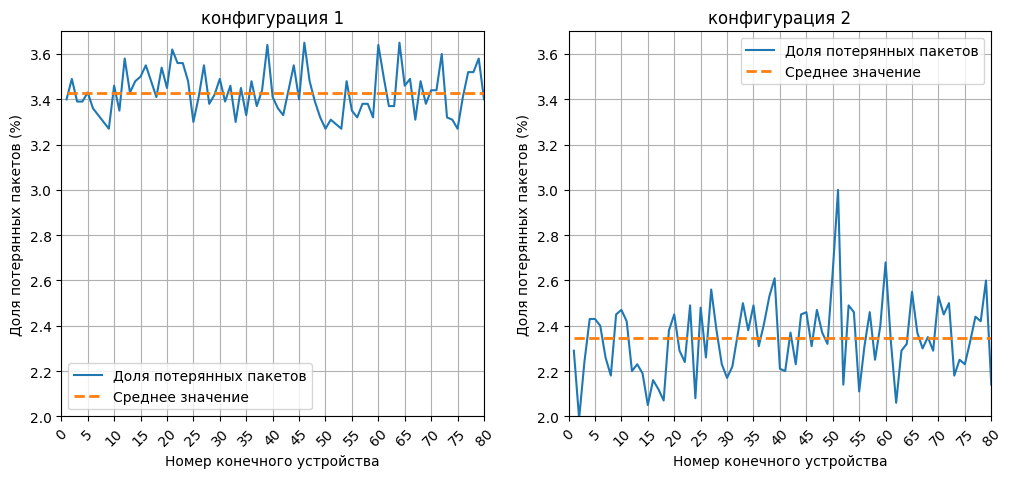

In [6]:
from statistics import median, mean, stdev
from statsmodels import robust
pl1 = [0.2, 0.29, 0.19, 0.19, 0.23, 0.16, 0.13, 0.1, 0.07, 0.26, 0.15, 0.38, 0.23, 0.28, 0.3, 0.35, 0.28, 0.21, 0.34, 0.25, 0.42, 0.36, 0.36, 0.28, 0.1, 0.21, 0.35, 0.18, 0.22, 0.29, 0.19, 0.26, 0.1, 0.25, 0.13, 0.28, 0.17, 0.24, 0.44, 0.21, 0.16, 0.13, 0.24, 0.35, 0.2, 0.45, 0.28, 0.19, 0.12, 0.07, 0.11, 0.09, 0.07, 0.28, 0.15, 0.12, 0.18, 0.18, 0.12, 0.44, 0.3, 0.17, 0.17, 0.45, 0.26, 0.29, 0.11, 0.28, 0.18, 0.24, 0.24, 0.4, 0.12, 0.11, 0.07, 0.21, 0.32, 0.32, 0.38, 0.2]
pl1plus = [x+3.2 for x in pl1]
pl10 = [2.29, 1.99, 2.24, 2.43, 2.43, 2.4, 2.26, 2.18, 2.45, 2.47, 2.42, 2.2, 2.23, 2.19, 2.05, 2.16, 2.12, 2.07, 2.38, 2.45, 2.29, 2.24, 2.49, 2.08, 2.48, 2.26, 2.56, 2.38, 2.23, 2.17, 2.22, 2.36, 2.5, 2.38, 2.49, 2.31, 2.41, 2.53, 2.61, 2.21, 2.2, 2.37, 2.23, 2.45, 2.46, 2.31, 2.47, 2.37, 2.32, 2.64, 3.0, 2.14, 2.49, 2.46, 2.11, 2.31, 2.46, 2.25, 2.4, 2.68, 2.33, 2.06, 2.29, 2.32, 2.55, 2.37, 2.3, 2.35, 2.29, 2.53, 2.45, 2.5, 2.18, 2.25, 2.23, 2.33, 2.44, 2.42, 2.6, 2.14]
x = [x for x in range(1,81)]
print(f'mean pl1: {mean(pl1plus)}')
print(f'mean pl10: {mean(pl10)}')
print(f'stdev pl1: {stdev(pl1plus)}')
print(f'stdev pl10: {stdev(pl10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()
    a.set_xlim([0, 80])
    a.set_ylim([2.0, 3.7])

ax[0].plot(x, pl1plus)
ax[0].plot(x, [mean(pl1plus) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[0].set_xlabel('Номер конечного устройства')
ax[0].set_ylabel('Доля потерянных пакетов (%)')

ax[1].plot(x, pl10)
ax[1].plot(x, [mean(pl10) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[1].set_xlabel('Номер конечного устройства')
ax[1].set_ylabel('Доля потерянных пакетов (%)')

ax[0].title.set_text('конфигурация 1')
ax[1].title.set_text('конфигурация 2')
ax[0].legend(['Доля потерянных пакетов', 'Среднее значение'])
ax[1].legend(['Доля потерянных пакетов', 'Среднее значение'])
plt.show()

mean delay1: 3.8926625
mean delay10: 0.9369125
stdev delay1: 0.20769487989093854
stdev delay10: 0.16833309306704664


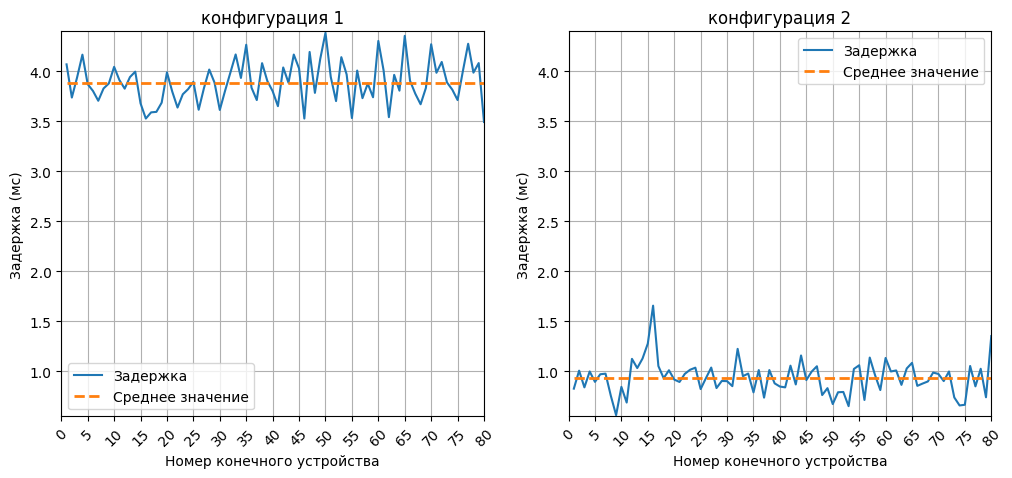

In [7]:
from statistics import median
delays10 = [0.8270000000000001, 1.0070000000000001, 0.8400000000000001, 0.9990000000000001, 0.895, 0.971, 0.977, 0.756, 0.562, 0.8450000000000001, 0.6880000000000001, 1.125, 1.0330000000000001, 1.1280000000000001, 1.278, 1.657, 1.053, 0.9319999999999999, 1.011, 0.9179999999999999, 0.894, 0.975, 1.016, 1.037, 0.823, 0.9319999999999999, 1.038, 0.833, 0.9039999999999999, 0.902, 0.852, 1.2249999999999999, 0.9520000000000001, 0.9779999999999999, 0.79, 1.013, 0.737, 1.013, 0.88, 0.848, 0.8400000000000001, 1.057, 0.869, 1.159, 0.9129999999999999, 0.9970000000000001, 1.0510000000000002, 0.763, 0.832, 0.673, 0.791, 0.794, 0.652, 1.024, 1.0610000000000002, 0.714, 1.138, 0.963, 0.8130000000000001, 1.1340000000000001, 0.9990000000000001, 1.009, 0.865, 1.029, 1.085, 0.855, 0.878, 0.8989999999999999, 0.988, 0.9740000000000001, 0.903, 0.9990000000000001, 0.739, 0.6589999999999999, 0.666, 1.054, 0.85, 1.026, 0.741, 1.353]
#delays1 = [x+3 for x in delays1]
delays1 = [4.069999999999999, 3.738, 3.941, 4.167, 3.872, 3.8040000000000003, 3.706, 3.8289999999999997, 3.879, 4.045, 3.913, 3.827, 3.9430000000000005, 3.997, 3.68, 3.528, 3.59, 3.595, 3.6870000000000003, 3.9899999999999998, 3.798, 3.6380000000000003, 3.771, 3.822, 3.895, 3.6159999999999997, 3.832, 4.018, 3.888, 3.614, 3.806, 3.987, 4.169, 3.934, 4.266, 3.837, 3.713, 4.082, 3.9029999999999996, 3.8019999999999996, 3.6519999999999997, 4.039, 3.886, 4.168, 4.029, 3.528, 4.194, 3.785, 4.122, 4.386, 3.9439999999999995, 3.7030000000000003, 4.1419999999999995, 3.9699999999999998, 3.533, 4.008, 3.732, 3.878, 3.741, 4.303999999999999, 4.009, 3.542, 3.965, 3.807, 4.355, 3.906, 3.776, 3.671, 3.834, 4.271, 3.9859999999999998, 4.094, 3.8890000000000002, 3.817, 3.713, 4.002000000000001, 4.276000000000001, 3.987, 4.083, 3.494]
x = [x for x in range(1,81)]
print(f'mean delay1: {mean(delays1)}')
print(f'mean delay10: {mean(delays10)}')
print(f'stdev delay1: {stdev(delays1)}')
print(f'stdev delay10: {stdev(delays10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()
    a.set_xlim([0, 80])
    a.set_ylim([0.55, 4.4])

ax[0].plot(x, delays1)
ax[0].plot(x, [median(delays1) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[0].set_xlabel('Номер конечного устройства')
ax[0].set_ylabel('Задержка (мс)')

ax[1].plot(x, delays10)
ax[1].plot(x, [median(delays10) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[1].set_xlabel('Номер конечного устройства')
ax[1].set_ylabel('Задержка (мс)')

ax[0].title.set_text('конфигурация 1')
ax[1].title.set_text('конфигурация 2')
ax[0].legend(['Задержка', 'Среднее значение'])
ax[1].legend(['Задержка', 'Среднее значение'])

plt.show()

In [9]:
from statistics import median, stdev
jitters10 = [0.35, 0.38, 0.355, 0.36200000000000004, 0.364, 0.384, 0.391, 0.34099999999999997, 0.294, 0.348, 0.328, 0.392, 0.365, 0.406, 0.40099999999999997, 0.47300000000000003, 0.402, 0.40499999999999997, 0.389, 0.34400000000000003, 0.354, 0.392, 0.35300000000000004, 0.371, 0.35100000000000003, 0.375, 0.345, 0.34299999999999997, 0.38, 0.35, 0.34400000000000003, 0.381, 0.36900000000000005, 0.393, 0.323, 0.386, 0.339, 0.378, 0.333, 0.355, 0.38699999999999996, 0.364, 0.38699999999999996, 0.365, 0.324, 0.38699999999999996, 0.38499999999999995, 0.365, 0.33599999999999997, 0.303, 0.328, 0.39399999999999996, 0.311, 0.348, 0.39, 0.31, 0.395, 0.39, 0.34, 0.357, 0.35, 0.4, 0.36200000000000004, 0.34900000000000003, 0.352, 0.32699999999999996, 0.34900000000000003, 0.379, 0.41300000000000003, 0.335, 0.34099999999999997, 0.34, 0.333, 0.301, 0.33399999999999996, 0.36200000000000004, 0.32899999999999996, 0.354, 0.315, 0.437]
jitters1 = [0.43, 0.399, 0.417, 0.439, 0.41, 0.40499999999999997, 0.39399999999999996, 0.412, 0.414, 0.425, 0.419, 0.41, 0.419, 0.423, 0.39399999999999996, 0.376, 0.383, 0.386, 0.392, 0.421, 0.402, 0.391, 0.40099999999999997, 0.40900000000000003, 0.414, 0.38699999999999996, 0.40700000000000003, 0.43, 0.41300000000000003, 0.39, 0.40499999999999997, 0.425, 0.441, 0.417, 0.45, 0.40499999999999997, 0.398, 0.429, 0.41300000000000003, 0.404, 0.391, 0.431, 0.41100000000000003, 0.444, 0.42700000000000005, 0.377, 0.44, 0.402, 0.437, 0.46, 0.414, 0.393, 0.437, 0.417, 0.378, 0.424, 0.395, 0.41, 0.40299999999999997, 0.451, 0.423, 0.38, 0.419, 0.40900000000000003, 0.457, 0.41800000000000004, 0.40299999999999997, 0.395, 0.40700000000000003, 0.449, 0.423, 0.433, 0.415, 0.40499999999999997, 0.39599999999999996, 0.424, 0.451, 0.424, 0.432, 0.375]
x = [x for x in range(1,81)]
print(f'mean jitter1: {mean(jitters1)}')
print(f'mean jitter10: {mean(jitters10)}')
print(f'stdev jitter1: {stdev(jitters1)}')
print(f'stdev jitter10: {stdev(jitters10)}')
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()
    a.set_xlim([0, 80])
    a.set_ylim([0.295, 0.475])

ax[0].plot(x, jitters1)
ax[0].plot(x, [mean(jitters1) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[0].set_xlabel('Номер конечного устройства')
ax[0].set_ylabel('Джиттер (мс)')

ax[1].plot(x, jitters10)
ax[1].plot(x, [mean(jitters10) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[1].set_xlabel('Номер конечного устройства')
ax[1].set_ylabel('Джиттер (мс)')

ax[0].title.set_text('конфигурация 1')
ax[1].title.set_text('конфигурация 2')
ax[0].legend(['Джиттер', 'Среднее значение'],loc="lower left")
ax[1].legend(['Джиттер', 'Среднее значение'])

plt.show()

mean jitter1: 0.4134875
mean jitter10: 0.3614625
stdev jitter1: 0.019969593183105514
stdev jitter10: 0.031508867046145056


# ASM-IX

In [1]:
pl1_500 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
pl1_1000 = [0.08, 0.1, 0.05, 0.07, 0.09, 0.08, 0.67, 0.07, 0.0, 0.0, 0.63, 0.09, 0.0, 0.05, 0.06, 0.06]
pl1_1500 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.69, 0.0, 0.01, 0.7, 0.0, 0.0, 0.0, 0.0]
pl1_2000 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.0, 0.0, 0.0, 0.39]
pl1_2500 = [3.0, 3.1, 3.0, 2.42, 2.9, 2.86, 3.48, 2.02, 3.1, 1.41, 3.83, 3.17, 3.17, 2.42, 3.17, 3.83]

pl2_500 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.53, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
pl2_1000 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.66, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
pl2_1500 = [0.0, 0.0, 0.0, 0.0, 0.71, 0.0, 0.04, 0.0, 0.0, 0.0, 0.46, 0.0, 0.0, 0.0, 0.0, 0.0]
pl2_2000 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
pl2_2500 = [1.98, 1.24, 2.43, 2.35, 1.95, 2.99, 3.01, 2.43, 2.5, 2.55, 2.09, 1.01, 2.53, 2.69, 1.77, 2.96]

In [2]:
pl1_500_total = 0.0
pl1_1000_total = 0.13
pl1_1500_total = 0.09
pl1_2000_total = 0.07
pl1_2500_total = 2.93

pl2_500_total = 0.03
pl2_1000_total = 0.04
pl2_1500_total = 0.08
pl2_2000_total = 0.0
pl2_2500_total = 2.28

In [3]:
pl1_500_throughput = 797.37
pl1_1000_throughput = 1433.86
pl1_1500_throughput = 2069.95
pl1_2000_throughput = 2636.16
pl1_2500_throughput = 2837.59

pl2_500_throughput = 805.55 
pl2_1000_throughput = 1432.92
pl2_1500_throughput = 2172.21
pl2_2000_throughput = 2840.44
pl2_2500_throughput = 3000.71

In [4]:
pl1_500_delay = 0.0186875
pl1_1000_delay = 0.27175
pl1_1500_delay = 0.1393125
pl1_2000_delay = 0.0881875
pl1_2500_delay = 3.4675625

pl2_500_delay = 0.124125
pl2_1000_delay = 0.0867
pl2_1500_delay = 0.095125
pl2_2000_delay = 0.0674375
pl2_2500_delay = 2.5766875

In [5]:
pl1_500_jitter = 0.005125
pl1_1000_jitter = 0.011
pl1_1500_jitter = 0.0085
pl1_2000_jitter = 0.011625
pl1_2500_jitter = 0.1009375

pl2_500_jitter = 0.0080625
pl2_1000_jitter = 0.007375
pl2_1500_jitter = 0.0080625
pl2_2000_jitter = 0.0095
pl2_2500_jitter = 0.077875

In [161]:
from statistics import median, mean, stdev
from statsmodels import robust
pl1_total = [0.0, 0.03, 0.6, 1.4, 3.2]
pl2_total = [0.00, 0.03, 0.04, 0.08, 2.01]

pl1_throughput = [777.37, 1289.18, 2069.95, 2636.16, 2837.59]
pl2_throughput = [805.55 , 1432.92, 2172.21, 2840.44, 3000.71]

pl1_delay = [0.0186875, 0.1393125, 0.4881875, 1.2, 2.9675625]
pl2_delay = [0.0674375, 0.124125, 0.0867, 0.095125, 2.1766875]

pl1_jitter = [0.005125, 0.0085, 0.018625, 0.051, 0.1009375]
pl2_jitter = [0.0095, 0.0080625, 0.007375, 0.0080625, 0.077875]

x = [500, 1000, 1500, 2000, 2500]
plt.show()

_, ax = plt.subplots(figsize=(12, 7), ncols=2, nrows=2)

for a in ax:
    for b in a:
        b.grid()
        b.xaxis.set_major_locator(ticker.MultipleLocator(500))
        xlabels = b.xaxis.get_ticklabels()
#         for label in xlabels:
#             label.set_rotation(45)
        #ylabels = b.yaxis.get_ticklabels()
    #a.set_xlim([0, 80])
    #a.set_ylim([2.0, 3.7])

ax[0, 0].plot(x, pl1_total, marker='o')
ax[0, 0].plot(x, pl2_total, marker='o')
ax[0, 0].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[0, 0].set_ylabel('Доля потерянных пакетов (%)')
ax[0, 0].legend(['1 контроллер', '2 контроллера'])
ax[0, 0].set_xlim([500, 2500])
ax[0, 0].set_ylim([0, 3.2])

ax[0, 1].plot(x, pl1_throughput, marker='o')
ax[0, 1].plot(x, pl2_throughput, marker='o')
ax[0, 1].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[0, 1].set_ylabel('Пропускная способность (Мбит/с)')
ax[0, 1].legend(['1 контроллер', '2 контроллера'])
ax[0, 1].set_xlim([500, 2500])
ax[0, 1].set_ylim([777, 3000])

ax[1,0].plot(x, pl1_delay, marker='o')
ax[1,0].plot(x, pl2_delay, marker='o')
ax[1,0].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[1,0].set_ylabel('Средняя задержка (мс)')
ax[1,0].legend(['1 контроллер', '2 контроллера'])
ax[1, 0].set_xlim([500, 2500])
ax[1, 0].set_ylim([0, 3.2])

ax[1,1].plot(x, pl1_jitter, marker='o')
ax[1,1].plot(x, pl2_jitter, marker='o')
ax[1,1].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[1,1].set_ylabel('Средний джиттер (мс)')
ax[1,1].legend(['1 контроллер', '2 контроллера'])
ax[1, 1].set_xlim([500, 2500])
ax[1, 1].set_ylim([0.006, 0.2])

plt.show()

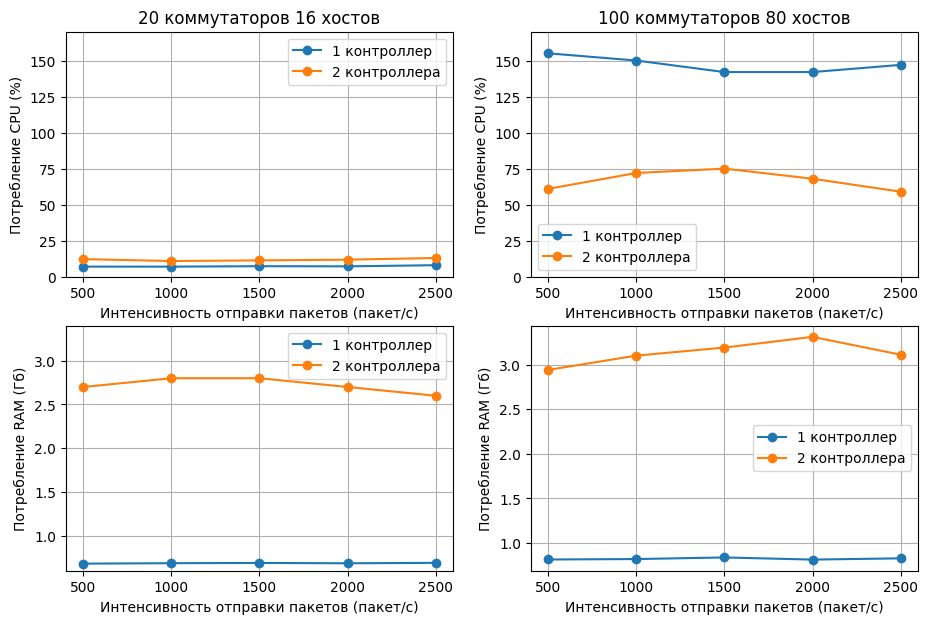

In [164]:
from statistics import median, mean, stdev
from statsmodels import robust

cpu16_1 = [7.01, 7.0, 7.3, 7.2, 8]
cpu16_2 = [12.22, 10.88, 11.35, 11.82, 13.0]

ram16_1 = [0.681, 0.686, 0.689, 0.685, 0.690,]
ram16_2 = [2.7, 2.8, 2.8, 2.7, 2.6]


cpu80_1 = [155, 150, 142, 142, 147]
cpu80_2 = [61, 72, 75, 68, 59]

ram80_1 = [0.816, 0.821, 0.839, 0.815, 0.829]
ram80_2 = [2.94, 3.1, 3.19, 3.31, 3.11]


_, ax = plt.subplots(figsize=(11, 7), ncols=2, nrows=2)

for a in ax:
    for b in a:
        b.grid()
        b.xaxis.set_major_locator(ticker.MultipleLocator(500))
        xlabels = b.xaxis.get_ticklabels()
#         for label in xlabels:
#             label.set_rotation(45)
        #ylabels = b.yaxis.get_ticklabels()
    #a.set_xlim([0, 80])
    #a.set_ylim([2.0, 3.7])

ax[0, 0].title.set_text('20 коммутаторов 16 хостов')
ax[0, 0].plot(x, cpu16_1, marker='o')
ax[0, 0].plot(x, cpu16_2, marker='o')
ax[0, 0].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[0, 0].set_ylabel('Потребление CPU (%)')
ax[0, 0].legend(['1 контроллер', '2 контроллера'])
ax[0,0].set_ylim([0, 170])

ax[0,1].title.set_text('100 коммутаторов 80 хостов')
ax[0,1].plot(x, cpu80_1, marker='o')
ax[0,1].plot(x, cpu80_2, marker='o')
#ax[0,1].plot(x, [110, 120, 126, 112, 100], linestyle = '--', linewidth = 2)
ax[0,1].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[0,1].set_ylabel('Потребление CPU (%)')
#ax[0,1].legend(['1 контроллер', '2 контроллера', 'кластер'])
ax[0,1].legend(['1 контроллер', '2 контроллера'])
ax[0,1].set_ylim([0, 170])

ax[1, 0].plot(x, ram16_1, marker='o')
ax[1, 0].plot(x, ram16_2, marker='o')
ax[1, 0].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[1, 0].set_ylabel('Потребление RAM (Гб)')
ax[1, 0].legend(['1 контроллер', '2 контроллера'])
ax[1,0].set_ylim([0.6, 3.4])

ax[1,1].plot(x, ram80_1, marker='o')
ax[1,1].plot(x, ram80_2, marker='o')
ax[1,1].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[1,1].set_ylabel('Потребление RAM (Гб)')
ax[1,1].legend(['1 контроллер', '2 контроллера'])
ax[1,0].set_ylim([0.6, 3.4])

plt.show()

In [128]:
_, ax = plt.subplots(figsize=(6, 10), nrows=2)

cpu16_1 = [7.01, 7.0, 7.3, 7.2, 8]
cpu16_2 = [12.22, 10.88, 11.35, 11.82, 13.0]

ram16_1 = [0.681, 0.686, 0.689, 0.685, 0.690,]
ram16_2 = [2.7, 3, 2.8, 2.7, 2.6]


cpu80_1 = [155, 142, 142, 147]
cpu80_2 = [61, 75, 68, 59]

ram80_1 = [0.816, 0.839, 0.815, 0.829]
ram80_2 = [2.94, 3.19, 3.31, 3.11]

rate = [5500,6000,6500,7000]

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(500))
    xlabels = a.xaxis.get_ticklabels()
#         for label in xlabels:
#             label.set_rotation(45)
        #ylabels = b.yaxis.get_ticklabels()
    #a.set_xlim([0, 80])
    #a.set_ylim([2.0, 3.7])

ax2 = ax[0].twinx()
ax[0].plot(x, cpu16_1, marker='o')
ax[0].plot(x, cpu16_2, marker='o')
ax[0].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[0].set_ylabel('Потребление CPU (%)')
ax[0].title.set_text('20 коммутаторов 16 конечных устройств')
ax[0].set_xlim([500, 2500])
ax[0].set_ylim([5, 15])
box = ax[0].get_position()
ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax[0].legend(['CPU 2 контроллера', 'RAM 1 контроллер'], bbox_to_anchor=(1.75, 1))

ax2.plot(x, ram16_1, '-o', color='red')
ax2.plot(x, ram16_2, '-o', color='green')
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax2.legend(['CPU 1 контроллер', 'RAM 2 контроллера'], bbox_to_anchor=(1.75, 0.6))
ax2.set_ylabel('Потребление RAM (Гб)')






ax3 = ax[1].twinx()
ax[1].plot(rate, cpu80_1, marker='o')
ax[1].plot(rate, cpu80_2, marker='o')
ax[1].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[1].set_ylabel('Потребление CPU (%)')
ax[1].title.set_text('100 коммутаторов 80 конечных устройств')
# ax[1].set_xlim([500, 2500])
# ax[1].set_ylim([5, 15])
box = ax[1].get_position()
ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax[1].legend(['CPU 2 контроллера', 'RAM 1 контроллер'], bbox_to_anchor=(1.75, 1))

ax3.plot(rate, ram80_1, '-o', color='red')
ax3.plot(rate, ram80_2, '-o', color='green')
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax3.legend(['CPU 1 контроллер', 'RAM 2 контроллера'], bbox_to_anchor=(1.75, 0.6))
ax3.set_ylabel('Потребление RAM (Гб)')

plt.show()

In [ ]:
from statistics import median, mean, stdev
from statsmodels import robust
pl1_total = [0.0, 0.13, 0.09, 0.07, 2.93]
pl2_total = [0.03, 0.04, 0.08, 0.00, 2.28]
x = [x for x in range(1,17)]
plt.show()

_, ax = plt.subplots(figsize=(12, 5), ncols=2)

for a in ax:
    a.grid()
    a.xaxis.set_major_locator(ticker.MultipleLocator(5))
    xlabels = a.xaxis.get_ticklabels()
    for label in xlabels:
        label.set_rotation(45)
    ylabels = a.yaxis.get_ticklabels()
    a.set_xlim([0, 80])
    a.set_ylim([2.0, 3.7])

ax[0].plot(x, pl1plus)
ax[0].plot(x, [mean(pl1plus) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[0].title.set_text('конфигурация 1')
ax[0].set_xlabel('Интенсивность отправки пакетов (пакет/с)')
ax[0].set_ylabel('Доля потерянных пакетов (%)')
ax[0].legend(['Доля потерянных пакетов', 'Среднее значение'])

ax[1].plot(x, pl10)
ax[1].plot(x, [mean(pl10) for _ in range(1, 81)], linestyle = '--', linewidth = 2)
ax[1].title.set_text('конфигурация 2')
ax[1].set_xlabel('Номер конечного устройства')
ax[1].set_ylabel('Доля потерянных пакетов (%)')
ax[1].legend(['Доля потерянных пакетов', 'Среднее значение'])

plt.show()